# Big Project: Fantasy Premier League (FPL) Points Predictor
## Data Rules Everything Around Me (DREAM) TEAM - Fall 2024 - CME 538
## Feras Abdulla - Maha Fakhroo - Syed Shahid Hossaini - Eric Guan
-----------------------------------------------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis (EDA) and Visualizations
-----------------------------------------------------------------------------------------------------------------------------------------------


Below, the different columns available in the database are listed and explained:

1) `'name'`: Name of player
2) `'position'`: Position on the pitch (Goalkeeper, Defender, Midfielder, Forward)
3) `'team'`: Premier League team with which the player is affiliated
4) `'xP'`: Expected points for a the player in the given fixture
5) `'assists'`: Actual number of assists
6) `'bonus'`: Actual number of bonus points awarded
7) `'bps'`: Stands for 'Bonus Points System', a raw score based on performance metrics like goals, assists, clean sheets, saves, tackles, and other contributions that is used to rank players and determine `'bonus'` scores.
8) `'clean_sheets'`: Boolean column identifying whether the player earned points for a clean sheet (i.e., his team conceded zero goals while he was on the pitch).
9) `'creativity'`: A measure of a player’s potential to create scoring opportunities (passes, crosses, etc.).
10) `'element'`: A unique ID for the player in the FPL system.
11) `'fixture'`: The ID of the match the player participated in.
12) `'goals_conceded'`: The number of goals the player's team conceded while they were on the pitch.
13) `'goals_scored'`: The number of goals scored by the player.
14) `'Influence_Creativity_Threat_Index'`: A combined metric summarizing the player's influence, creativity, and threat.
15) `'influence'`: A measure of a player’s impact on a match (defensive and offensive contributions).
16) `'kickoff_time'`: The start time of the match.
17) `'minutes'`: The number of minutes the player was on the pitch during the match.
18) `'opponent_team'`: The ID of the opposing team in the fixture.
19) `'own_goals'`: The number of own goals scored by the player.
20) `'penalties_missed'`: The number of penalty kicks missed by the player.
21) `'penalties_saved'`: The number of penalty kicks saved by the player (goalkeepers only).
22) `'red_cards'`: The number of red cards received by the player.
23) `'round'`: The fantasy round number of the match.
24) `'saves'`: The number of saves made by the player (goalkeepers only).
25) `'selected'`: The number of FPL managers who selected the player for their teams in this round.
26) `'team_a_score'`: The number of goals scored by the away team in the match.
27) `'team_h_score'`: The number of goals scored by the home team in the match.
28) `'threat'`: A measure of a player’s likelihood of scoring goals based on their attacking actions.
29) `'total_points'`: The total FPL points earned by the player in the match. `This column will be our label`.
30) `'transfers_balance'`: The net number of transfers for the player (transfers in minus transfers out).
31) `'transfers_in'`: The number of FPL teams that transferred the player in before this match.
32) `'transfers_out'`: The number of FPL teams that transferred the player out before this match.
33) `'value'`: The player’s price in FPL (in millions GBP).
34) `'was_home'`: A boolean indicating if the player's team was playing at home (True/1 = home, False/0 = away).
35) `'yellow_cards'`: The number of yellow cards received by the player.
36) `'GW'`: The specific gameweek for the match.
37) `'expected_goals'`: A metric predicting the likelihood of the player scoring based on their chances.
38) `'expected_assists'`: A metric predicting the likelihood of the player assisting a goal.
39) `'expected_goal_involvements'`: The sum of `'expected_goals'` and `'expected_assists'`, representing the player’s total expected goal contributions.

## Import Packages
Imports essential Python libraries and machine learning tools for data analysis, visualization, and model evaluation, as well as functions for splitting data into training and testing sets. These are typically used in machine learning projects to build and assess predictive models.

In [843]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import ast
import unicodedata

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import Data
Let's start by importing the `'master.csv'` file into a dataframe.

In [844]:
master = pd.read_csv('../master.csv')
master.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,Influence_Creativity_Threat_Index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,expected_goals,expected_assists,expected_goal_involvements
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14T19:15:00Z,45,5,0,0,0,0,1,0,32205,3,1,32.0,1,0,0,0,55,True,0,1,0.392763,0.000000,0.392763
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,6,2,0,2.2,10.4,2020-09-12T19:00:00Z,90,14,0,0,0,0,1,0,70232,2,0,0.0,1,0,0,0,50,True,0,1,0.000000,0.000000,0.000000
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,7,0,0,0.0,0.0,2020-09-14T19:15:00Z,0,5,0,0,0,0,1,0,2010,3,1,0.0,0,0,0,0,50,True,0,1,NaN,NaN,NaN
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,8,2,0,1.8,18.2,2020-09-14T17:00:00Z,90,20,0,0,0,0,1,2,462939,2,0,0.0,1,0,0,0,50,True,0,1,0.000000,0.000000,0.000000
4,Abdoulaye DoucourA©,MID,Everton,1.3,0,0,20,1,44.6,512,4,0,0,6.9,20.4,2020-09-13T15:30:00Z,90,17,0,0,0,0,1,0,143040,1,0,4.0,3,0,0,0,55,False,0,1,0.000000,0.205708,0.205708


In [845]:
master.shape

(111920, 39)

In [846]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111920 entries, 0 to 111919
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   name                               111920 non-null  object 
 1   position                           111920 non-null  object 
 2   team                               111920 non-null  object 
 3   xP                                 111920 non-null  float64
 4   assists                            111920 non-null  int64  
 5   bonus                              111920 non-null  int64  
 6   bps                                111920 non-null  int64  
 7   clean_sheets                       111920 non-null  int64  
 8   creativity                         111920 non-null  float64
 9   element                            111920 non-null  int64  
 10  fixture                            111920 non-null  int64  
 11  goals_conceded                     1119

# Data Exploration and Cleaning

### Aligning Categorical Columns

Let's examine the columns that contain categorical data, including how many unique values each contains and what those unique values are. 

In [847]:
# Define categorical columns
categorical_columns = ['position', 'team']

# Calculate how many unique values there are for each categorical column
unique_vals = master[categorical_columns].nunique()
print("Unique values in categorical features:")
print(unique_vals)

# Print different categorical values
for i in categorical_columns:
    print(f"\nUnique values in '{i}':")
    print(master[i].unique())

Unique values in categorical features:
position     5
team        27
dtype: int64

Unique values in 'position':
['FWD' 'DEF' 'MID' 'GK' 'GKP']

Unique values in 'team':
['Brighton' 'West Ham' 'Sheffield Utd' 'Everton' 'Fulham' 'Wolves' 'Leeds'
 'Leicester' 'Liverpool' 'West Brom' 'Arsenal' 'Southampton' 'Newcastle'
 'Chelsea' 'Crystal Palace' 'Spurs' 'Man Utd' 'Man City' 'Aston Villa'
 'Burnley' 'Watford' 'Norwich' 'Brentford' 'Bournemouth' "Nott'm Forest"
 'Luton' 'Ipswich']


As we can see, there are 5 unique player positions: `'FWD'` = Forward, `'DEF'` = Defender, `'MID'` = Midfielder, and `'GK/GKP'` = Goalkeeper. Both GK and GKP refer to the same position but are written differently due to different syntax formats across different seasons, so we will have to align them into one value: `'GK'`. We will also change the abbreviated name of Nottingham Forest in the team column, `'Nott'm Forest'`, to the full name: `'Nottingham Forest'`.

In [848]:
master['position'] = master['position'].replace('GKP', 'GK') # GKP --> GK
master['team'] = master['team'].replace("Nott'm Forest", "Nottingham Forest") # Nott'm Forest --> Nottingham Forest

# Calculate how many unique values there are for each categorical column
unique_vals = master[categorical_columns].nunique()
print("Unique values in categorical features:")
print(unique_vals)

# Print different categorical values
for i in categorical_columns:
    print(f"\nUnique values in '{i}':")
    print(master[i].unique())

Unique values in categorical features:
position     4
team        27
dtype: int64

Unique values in 'position':
['FWD' 'DEF' 'MID' 'GK']

Unique values in 'team':
['Brighton' 'West Ham' 'Sheffield Utd' 'Everton' 'Fulham' 'Wolves' 'Leeds'
 'Leicester' 'Liverpool' 'West Brom' 'Arsenal' 'Southampton' 'Newcastle'
 'Chelsea' 'Crystal Palace' 'Spurs' 'Man Utd' 'Man City' 'Aston Villa'
 'Burnley' 'Watford' 'Norwich' 'Brentford' 'Bournemouth'
 'Nottingham Forest' 'Luton' 'Ipswich']


### Encoding the Categorical Features

Now, to encode the categorical features. We will one-hot encode the `'position'` column, since there are only 4 unique values. However, we will label-encode the `'team'` column and create a new column: `'team_label'`. We do this because we have 27 unique teams in the database, and one-hot encoding `'team'` would increase dimensionality substantially. Furthermore, our ML model will be a Random Forest, which does not infer ordinality, so label encoding will not be an issue.

In [849]:
# One-hot encode the 'position' column while retaining the original column
position_dummies = pd.get_dummies(master['position'], prefix='position')
master = pd.concat([master, position_dummies], axis=1)

# Label encode the 'team' column while retaining the original column
le = LabelEncoder()
master['team_label'] = le.fit_transform(master['team'])

master.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,Influence_Creativity_Threat_Index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,expected_goals,expected_assists,expected_goal_involvements,position_DEF,position_FWD,position_GK,position_MID,team_label
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14T19:15:00Z,45,5,0,0,0,0,1,0,32205,3,1,32.0,1,0,0,0,55,True,0,1,0.392763,0.000000,0.392763,False,True,False,False,4
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,6,2,0,2.2,10.4,2020-09-12T19:00:00Z,90,14,0,0,0,0,1,0,70232,2,0,0.0,1,0,0,0,50,True,0,1,0.000000,0.000000,0.000000,True,False,False,False,25
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,7,0,0,0.0,0.0,2020-09-14T19:15:00Z,0,5,0,0,0,0,1,0,2010,3,1,0.0,0,0,0,0,50,True,0,1,NaN,NaN,NaN,False,False,False,True,4
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,8,2,0,1.8,18.2,2020-09-14T17:00:00Z,90,20,0,0,0,0,1,2,462939,2,0,0.0,1,0,0,0,50,True,0,1,0.000000,0.000000,0.000000,False,False,True,False,20
4,Abdoulaye DoucourA©,MID,Everton,1.3,0,0,20,1,44.6,512,4,0,0,6.9,20.4,2020-09-13T15:30:00Z,90,17,0,0,0,0,1,0,143040,1,0,4.0,3,0,0,0,55,False,0,1,0.000000,0.205708,0.205708,False,False,False,True,8


### Converting to DateTime, Extracting Time Elements, and adding a Season Identifier Column

Now let us convert the `'kickoff_time'` column into datetime format, extract the `'Hour'`, `'DayOfWeek'`, `'Month'`, `'Weekend'`, and `'WeekOfYear'` elements, and store them into new columns in the `'master'` df. We will also create a column called `'Season'` that will classify each row in the correct Premier League season between 2020-2021 and 2024-2025, based on the `'kickoff_time'`.

In [850]:
master['kickoff_time'] = pd.to_datetime(master['kickoff_time']).dt.tz_localize(None)

master['Hour'] = master['kickoff_time'].dt.hour # Extract hour
master['DayOfWeek'] = master['kickoff_time'].dt.dayofweek # Extract day of week (Monday = 0 to Sunday = 6)
master['Weekend'] = master['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0) # Determine if weekend (1 if yes, 0 if no)
master['WeekOfYear'] = master['kickoff_time'].dt.isocalendar().week # Extract week of year
master['Month'] = master['kickoff_time'].dt.month # Extract month
master['Year'] = master['kickoff_time'].dt.year # Extract year

# Define the function to assign seasons
def assign_season(kickoff_time):
    if pd.Timestamp('2020-08-01') <= kickoff_time <= pd.Timestamp('2021-05-31'):
        return '2020-2021'
    elif pd.Timestamp('2021-08-01') <= kickoff_time <= pd.Timestamp('2022-05-31'):
        return '2021-2022'
    elif pd.Timestamp('2022-08-01') <= kickoff_time <= pd.Timestamp('2023-05-31'):
        return '2022-2023'
    elif pd.Timestamp('2023-08-01') <= kickoff_time <= pd.Timestamp('2024-05-31'):
        return '2023-2024'
    elif pd.Timestamp('2024-08-01') <= kickoff_time <= pd.Timestamp('2025-05-31'):
        return '2024-2025'
    else:
        return None  # If the date doesn't fall into any range

# Apply the function to create the 'season' column
master['Season'] = master['kickoff_time'].apply(assign_season)

master.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,Influence_Creativity_Threat_Index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,expected_goals,expected_assists,expected_goal_involvements,position_DEF,position_FWD,position_GK,position_MID,team_label,Hour,DayOfWeek,Weekend,WeekOfYear,Month,Year,Season
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14 19:15:00,45,5,0,0,0,0,1,0,32205,3,1,32.0,1,0,0,0,55,True,0,1,0.392763,0.000000,0.392763,False,True,False,False,4,19,0,0,38,9,2020,2020-2021
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,6,2,0,2.2,10.4,2020-09-12 19:00:00,90,14,0,0,0,0,1,0,70232,2,0,0.0,1,0,0,0,50,True,0,1,0.000000,0.000000,0.000000,True,False,False,False,25,19,5,1,37,9,2020,2020-2021
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,7,0,0,0.0,0.0,2020-09-14 19:15:00,0,5,0,0,0,0,1,0,2010,3,1,0.0,0,0,0,0,50,True,0,1,NaN,NaN,NaN,False,False,False,True,4,19,0,0,38,9,2020,2020-2021
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,8,2,0,1.8,18.2,2020-09-14 17:00:00,90,20,0,0,0,0,1,2,462939,2,0,0.0,1,0,0,0,50,True,0,1,0.000000,0.000000,0.000000,False,False,True,False,20,17,0,0,38,9,2020,2020-2021
4,Abdoulaye DoucourA©,MID,Everton,1.3,0,0,20,1,44.6,512,4,0,0,6.9,20.4,2020-09-13 15:30:00,90,17,0,0,0,0,1,0,143040,1,0,4.0,3,0,0,0,55,False,0,1,0.000000,0.205708,0.205708,False,False,False,True,8,15,6,1,37,9,2020,2020-2021


### Decoding Player Names into Conventional Alphabetical Format

Now, we should filter the `'name'` column to remove any symbols/non-alphabetical characters, to decode the text into normal alphabet format.

In [851]:
def remove_accents(df):
    ''' Replace recurring symbols with their alphanumeric counterparts '''
    df['name'] = df['name'].str.replace('A©', 'é', regex=False)
    df['name'] = df['name'].str.replace('A§', 'ç', regex=False)
    df['name'] = df['name'].str.replace('A­', 'í', regex=False)
    df['name'] = df['name'].str.replace('A3', 'ó', regex=False)
    df['name'] = df['name'].str.replace('A¶', 'ö', regex=False)
    df['name'] = df['name'].str.replace('A1⁄4', 'ü', regex=False)
    df['name'] = df['name'].str.replace('A¤', 'ä', regex=False)
    df['name'] = df['name'].str.replace('A«', 'ë', regex=False)
    df['name'] = df['name'].str.replace('A£', 'ã', regex=False)
    df['name'] = df['name'].str.replace('A\x87', 'ć', regex=False)
    df['name'] = df['name'].str.replace('A\x98', 'O', regex=False)
    df['name'] = df['name'].str.replace('A\x82', 'l', regex=False)


    ''' Deal with specific outlier names '''
    df['name'] = df['name'].str.replace('FernA¡ndez', 'Fernández', regex=False)
    df['name'] = df['name'].str.replace('Marek RodA¡k', 'Marek Rodák', regex=False)
    df['name'] = df['name'].str.replace('GroA', 'Groß', regex=False)
    df['name'] = df['name'].str.replace('Davinson SA¡nchez', 'Davinson Sánchez', regex=False)
    df['name'] = df['name'].str.replace('Cengiz Ander', 'Cengiz Under', regex=False)
    df['name'] = df['name'].str.replace('FabiA¡n Balbuena', 'Fabián Balbuena', regex=False)
    df['name'] = df['name'].str.replace('Robert SA¡nchez', 'Robert Sánchez', regex=False)
    df['name'] = df['name'].str.replace('SaAol Aiguez', 'Saúl Níguez', regex=False)
    df['name'] = df['name'].str.replace('Alvaro', 'Alvaro', regex=False)
    df['name'] = df['name'].str.replace('Son Heung-min', 'Heung-Min Son', regex=False)
    df['name'] = df['name'].str.replace('AdriA¡n San Miguel del Castillo', 'Adrián San Miguel del Castillo', regex=False)
    df['name'] = df['name'].str.replace('A\x96zil', 'Ozil', regex=False)
    df['name'] = df['name'].str.replace('A\x87aglar', 'Caglar', regex=False)
    df['name'] = df['name'].str.replace('AdriA¡n Bernabé', 'Adrián Bernabé', regex=False)
    df['name'] = df['name'].str.replace('NicolA¡s Otamendi', 'Nicolás Otamendi', regex=False)
    df['name'] = df['name'].str.replace('Thiago AlcA¡ntara', 'Thiago Alcántara', regex=False)
    df['name'] = df['name'].str.replace('SaA d Benrahma', 'Said Benrahma', regex=False)
    df['name'] = df['name'].str.replace('ImrA¢n', 'Imran', regex=False)
    df['name'] = df['name'].str.replace('DerviA\x9foA\x9flu', 'Dervişoğlu', regex=False)
    df['name'] = df['name'].str.replace('Francisco Jorge TomA¡s Oliveira', 'Francisco Jorge Tomás Oliveira', regex=False)
    df['name'] = df['name'].str.replace('Benjamin Chilwell', 'Ben Chilwell', regex=False)
    df['name'] = df['name'].str.replace('Emiliano Martínez Romero', 'Emiliano Martínez', regex=False)
    df['name'] = df['name'].str.replace('Gabriel dos Santos Magalhães', 'Gabriel Magalhães', regex=False)
    df['name'] = df['name'].str.replace('Gabriel Teodoro Martinelli Silva', 'Gabriel Martinelli', regex=False)
    df['name'] = df['name'].str.replace('Gabriel Martinelli Silva', 'Gabriel Martinelli', regex=False)
    df['name'] = df['name'].str.replace('Joelinton CA¡ssio ApolinA¡rio de Lira', 'Joelinton', regex=False)
    df['name'] = df['name'].str.replace('Matteo Guendouzi', 'Mattéo Guendouzi', regex=False)
    df['name'] = df['name'].str.replace('Romain SaA ss', 'Romain Saïss', regex=False)
    df['name'] = df['name'].str.replace('Pablo HernA¡ndez Domínguez', 'Pablo Hernández Domínguez', regex=False)
    df['name'] = df['name'].str.replace('RAoben Diogo da Silva Neves', 'Rúben da Silva Neves', regex=False)
    df['name'] = df['name'].str.replace('Paulo Gazzaniga Farias', 'Paulo Gazzaniga', regex=False)
    df['name'] = df['name'].str.replace('Tanguy Ndombélé Alvaro', 'Tanguy Ndombele', regex=False)
    df['name'] = df['name'].str.replace('Bruno Borges Fernandes', 'Bruno Fernandes', regex=False)
    df['name'] = df['name'].str.replace('Bruno Miguel Borges Fernandes', 'Bruno Fernandes', regex=False)

    return df

master = remove_accents(master)


### Duplicates

Let's also examine the data for the presence of duplicate rows.

In [852]:
print(f"Number of duplicate rows in the master data set: {master.duplicated().sum()}")

Number of duplicate rows in the master data set: 0


Nice, no duplicates! Also, this makes sense, since each row in our data represents a unique player in a unique gameweek in a unique fixture, so duplicates would have indicated errors in data sourcing.

### Missing Values / NaNs

First, let's explore how many missing values exist in the master dataframe:

In [853]:
# Determine missing values for each column
missing_values = master.isnull().sum()

# Create a df of missing values
missing_df = pd.DataFrame({'Missing Values': missing_values})

# Show all rows
pd.set_option('display.max_rows', None)  # Show all rows
missing_df

,Missing Values
name,0
position,0
team,0
xP,0
assists,0
bonus,0
bps,0
clean_sheets,0
creativity,0
element,0


So, we see that our efforts to impute/drop missing values will have to focus on three main features: `'expected_goals'`, `'expected_assists'`, and `'expected_goal_involvements'`. We will go ahead and impute these missing values with the mean of that player's xG/xA/xGI for that specific season, to provide a temporally appropriate context for the substitution. If no values exist in that season, we will impute with the mean of that player's xG/xA/xGI across all seasons.

In [854]:
# Function to impute missing values for grouped data
def impute_mean_per_group(df, group_cols):
    # Identify columns with missing values
    missing_columns = df.columns[df.isnull().any()]
    
    for col in missing_columns:
        # Step 1: Impute missing values using the mean for each group (name, season)
        df[col] = df.groupby(group_cols)[col].transform(
            lambda group: group.fillna(group.mean())
        )
        
        # Step 2: Handle edge cases where the group mean couldn't be calculated
        # Fall back to mean for the player across all seasons
        df[col] = df.groupby('name')[col].transform(
            lambda group: group.fillna(group.mean())
        )
    
    return df

# Apply the imputation
master = impute_mean_per_group(master, ['name', 'Season'])

# Determine missing values for each column
missing_values = master.isnull().sum()

# Create a df of missing values
missing_df = pd.DataFrame({'Missing Values': missing_values})

# Show all rows
pd.set_option('display.max_rows', None)  # Show all rows
missing_df

,Missing Values
name,0
position,0
team,0
xP,0
assists,0
bonus,0
bps,0
clean_sheets,0
creativity,0
element,0


As we can see, we still have almost 10,000 missing values in each of `'expected_goals'`, `'expected_assists'`, and `'expected_goal_involvements'`. These exist even after trying to impute based on both season/player context and player context. Therefore, we will go ahead and drop the rows with the remaining missing values.

In [855]:
# Define the columns to check for missing values
master = master.dropna()
master.shape

(102148, 51)

### Filtering Out Rows with Zero or Limited Minutes Played

Now, we will filter out rows where the number of minutes played, `'minutes'`, is zero. The original `'master'` dataframe includes all players in a season, including those who are listed in a team's squad but do not play (those on the bench).  

We should also filter out rows with limited `'minutes'` of gameplay, because they tend to have incomplete or missing data. They may also bias our model and analysis by including late-game strategies (i.e., some managers might substitute a player in at the end of a game where his team is leading to increase defensive posture and maintain their lead). However, in order to avoid favoring early starters, we need to strike a balance in choosing the `'minutes'` threshold.

We will proceed by filtering out players with less than 5 minutes of gameplay.

In [856]:
# Print original length
print('Original Length of master dataframe: ', master.shape[0])

# Print the number of rows with minutes = 0
print(f"Number of rows with minutes = 0: {master[master['minutes'] == 0].shape[0]}")
# Print the number of rows with minutes between 0 and 5
print(f"Number of rows with minutes between 0 and 5: {master[(master['minutes'] > 0) & (master['minutes'] < 5)].shape[0]}")

Original Length of master dataframe:  102148
Number of rows with minutes = 0: 57408
Number of rows with minutes between 0 and 5: 1773


As we can see, a large portion of the database (57,408 rows or 56.2%) represented players who were not active in a given fixture. By filtering these out, we can focus on players with concrete contributions when creating visualizations and designing our model. Furthermore, players with between 0 and 5 minutes of gameplay will also be dropped, and they represent a much smaller number of entries (1773 rows).

In [857]:
master = master[master['minutes'] >= 5]

print('Length of master dataframe after filtering out players with 0-5 minutes of gameplay:', master.shape[0])

Length of master dataframe after filtering out players with 0-5 minutes of gameplay: 42967


### Dealing with Invalid Rows

Now, let us examine invalid occurrences of expected goal metrics. If a player's `'goals_scored'` are greater than zero, then that row's `'expected_goals'` cannot be zero. Therefore, we need to examine the dataframe for those conditions and impute `'expected_goals'` to be the average of the rows that do not meet this condition for that player in that season.

In [858]:
# Filter rows where goals_scored > 0 and expected_goals == 0
invalid_rows = master[(master['goals_scored'] > 0) & (master['expected_goals'] == 0)]

# Count how many times this happens
invalid_count = len(invalid_rows)

print(f"Number of rows where goals_scored > 0 but expected_goals = 0: {invalid_count}")

Number of rows where goals_scored > 0 but expected_goals = 0: 373


In [859]:
# Impute expected_goals with the mean for that player and season,
# with fallback to player-level or global mean
def impute_expected_goals(row):
    if row['goals_scored'] > 0 and row['expected_goals'] == 0:
        # Calculate the mean of expected_goals for the player and season
        season_mean = master[
            (master['name'] == row['name']) & 
            (master['Season'] == row['Season']) & 
            (master['expected_goals'] > 0)
        ]['expected_goals'].mean()
        
        # Fallback to the mean for the player across all seasons
        if pd.isna(season_mean):
            player_mean = master[
                (master['name'] == row['name']) & 
                (master['expected_goals'] > 0)
            ]['expected_goals'].mean()
            return player_mean if pd.notna(player_mean) else master['expected_goals'].mean()
        
        return season_mean
    else:
        return row['expected_goals']  # Leave unchanged

# Apply the imputation
master['expected_goals'] = master.apply(impute_expected_goals, axis=1)

# Verify the result
rows_with_condition = master[(master['goals_scored'] > 0) & (master['expected_goals'] == 0)]
print(f"Number of rows where goals_scored > 0 but expected_goals = 0: {len(rows_with_condition)}")

Number of rows where goals_scored > 0 but expected_goals = 0: 0


### Negative Values

Now, we need to check for negative values

In [860]:
for column in master.columns:
    # Check if the column is numeric
    if master[column].dtype in ['int64', 'float64']:
        # Filter rows with negative values
        negatives = master[master[column] < 0]
        if not negatives.empty:
            print(f"Negative values found in column '{column}':")
            print(len(negatives))
            print("\n")

Negative values found in column 'xP':
1621


Negative values found in column 'bps':
1490


Negative values found in column 'total_points':
502


Negative values found in column 'transfers_balance':
21739




`'total_points'`, `'bps'`, and `'transfers_balance'` can have negative values. Players can be penalized for events like own goals, red cards, and goals conceded, so those negatives can and should be retained. In addition, `'transfers_balance'` is a net figure that represents transfers in minus transfers out, so no issue with negatives here either.

However, `'xP'` values are generally non-negative because they are probabilities multiplied by point weights. Negative xPs can indicate errors in data sourcing. Negative `'xP'` will thus be imputed with the average of that player's xP from the gameweeks before and after the negative value. Care will be taken so that there is no jumping between seasons, since the `'master'` dataframe is a concatenation of several seasons. If adjacent xPs for that same player are also negative, it will be replaced with the closest neighbor.

In [861]:
# Replace negative xP values with NaN
master.loc[master['xP'] < 0, 'xP'] = np.nan

# Function to impute xP
def impute_xp(df):
    # Iterate through each player's data
    for name, group in df.groupby('name'):
        # Loop through rows with NaN in xP
        for idx in group[group['xP'].isna()].index:
            current_gw = df.loc[idx, 'GW']

            # Check for previous and next GWs in the same season
            previous_idx = group[
                (group['GW'] < current_gw) & (~group['xP'].isna())
            ].index.max()
            next_idx = group[
                (group['GW'] > current_gw) & (~group['xP'].isna())
            ].index.min()

            if pd.notna(previous_idx) and pd.notna(next_idx):
                # Average of the previous and next valid xP values
                df.loc[idx, 'xP'] = (df.loc[previous_idx, 'xP'] + df.loc[next_idx, 'xP']) / 2
            elif pd.notna(previous_idx):
                # Use the previous valid xP value
                df.loc[idx, 'xP'] = df.loc[previous_idx, 'xP']
            elif pd.notna(next_idx):
                # Use the next valid xP value
                df.loc[idx, 'xP'] = df.loc[next_idx, 'xP']
            else:
                # Fallback: Use the closest available xP value
                neighbor_idx = group[~group['xP'].isna()].index.min()
                if pd.notna(neighbor_idx):
                    df.loc[idx, 'xP'] = df.loc[neighbor_idx, 'xP']
    return df

# Apply the imputation function
master = impute_xp(master)

# Verify the result
print(len(master[master['xP'].isna()]))  # Should be empty if all NaNs are imputed

29


The remaining NaNs are likely due to zero applicable values to impute with, based on our imputation conditions. Therefore, let's go ahead and drop these 29 rows.

In [862]:
print(master.shape)
master = master.dropna()
print(master.shape)

(42967, 51)
(42938, 51)


### Adding Cumulative and Combination Features

Let's also go ahead and add some cumulative/combined metric columns to our database. In particular, let's add 'goals per minute': `'gpm'`, 'assists per minute': `'apm'`, `'cumulative_gpm'`, `'cumulative_apm'`, `'cumulative_goals'`, `'cumulative_assists'`, `'cumulative_xG'`, `'cumulative_xA'`, `'cumulative_xGI'`, `'cumulative_xP'`, and `'cumulative_points'`.

In [863]:
master['gpm'] = master['goals_scored']/master['minutes'] # Create a column for goals per minute
master['apm'] = master['assists']/master['minutes'] # Create a column for assists per minute

# Ensure the 'master' DataFrame is sorted by 'season', 'name', and 'kickoff_time'
master = master.sort_values(by=['Season', 'name', 'kickoff_time'])

# Define a function to calculate cumulative metrics for each season
def calculate_cumulative_metrics(group):
    group['cumulative_goals'] = group['goals_scored'].cumsum()
    group['cumulative_assists'] = group['assists'].cumsum()
    group['cumulative_xG'] = group['expected_goals'].cumsum()
    group['cumulative_xA'] = group['expected_assists'].cumsum()
    group['cumulative_xGI'] = group['expected_goal_involvements'].cumsum()
    group['cumulative_gpm'] = group['cumulative_goals'] / group['minutes'].cumsum()
    group['cumulative_apm'] = group['cumulative_assists'] / group['minutes'].cumsum()
    group['cumulative_xP'] = group['xP'].cumsum()
    group['cumulative_points'] = group['total_points'].cumsum()
    group['cumulative_minutes'] = group['minutes'].cumsum()
    return group

# Group by both 'season' and 'name', then apply the function
master = master.groupby(['Season', 'name']).apply(calculate_cumulative_metrics)

# Reset the index
master.reset_index(drop=True, inplace=True)

# Display the head
master.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,Influence_Creativity_Threat_Index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,expected_goals,expected_assists,expected_goal_involvements,position_DEF,position_FWD,position_GK,position_MID,team_label,Hour,DayOfWeek,Weekend,WeekOfYear,Month,Year,Season,gpm,apm,cumulative_goals,cumulative_assists,cumulative_xG,cumulative_xA,cumulative_xGI,cumulative_gpm,cumulative_apm,cumulative_xP,cumulative_points,cumulative_minutes
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14 19:15:00,45,5,0,0,0,0,1,0,32205,3,1,32.0,1,0,0,0,55,True,0,1,0.392763,0.000000,0.392763,False,True,False,False,4,19,0,0,38,9,2020,2020-2021,0.000000,0.000000,0,0,0.392763,0.000000,0.392763,0.000000,0.000000,0.5,1,45
1,Aaron Connolly,FWD,Brighton,4.0,0,2,27,1,11.3,78,16,0,1,6.9,34.8,2020-09-20 13:00:00,89,14,0,0,0,0,2,0,35030,3,0,23.0,8,-1161,5332,6493,55,False,0,2,0.161510,0.016604,0.178114,False,True,False,False,4,13,6,1,38,9,2020,2020-2021,0.011236,0.000000,1,0,0.554273,0.016604,0.570877,0.007463,0.000000,4.5,9,134
2,Aaron Connolly,FWD,Brighton,2.7,0,0,2,0,12.1,78,19,2,0,1.9,0.0,2020-09-26 11:30:00,73,13,0,0,0,0,3,0,55356,3,2,8.0,2,13526,26823,13297,55,True,0,3,0.032655,0.040683,0.073338,False,True,False,False,4,11,5,1,39,9,2020,2020-2021,0.000000,0.000000,1,0,0.586928,0.057287,0.644215,0.004831,0.000000,7.2,11,207
3,Aaron Connolly,FWD,Brighton,2.7,0,0,7,0,0.3,78,32,3,0,0.7,3.0,2020-10-03 14:00:00,65,7,0,0,0,0,4,0,55125,2,4,4.0,2,-1311,10399,11710,55,False,0,4,0.000000,0.000000,0.000000,False,True,False,False,4,14,5,1,40,10,2020,2020-2021,0.000000,0.000000,1,0,0.586928,0.057287,0.644215,0.003676,0.000000,9.9,13,272
4,Aaron Connolly,FWD,Brighton,3.0,1,0,13,0,10.3,78,40,0,0,3.0,17.2,2020-10-18 13:00:00,12,6,0,0,0,0,5,0,46774,1,1,2.0,4,-8992,5860,14852,55,False,0,5,0.000000,0.052242,0.052242,False,True,False,False,4,13,6,1,42,10,2020,2020-2021,0.000000,0.083333,1,1,0.586928,0.109529,0.696457,0.003521,0.003521,12.9,17,284


### Converting Player `'value'` Unit to Million GBP (£)

The unit for player `'value'` is also 100,000s of GBP (£). For example, a `'value'` of 50 is equivalent to £5 million. Therefore, let's go ahead and convert that column to units of millions of GBP.

In [864]:
master['value'] = master['value']/10

### Saving a New, Cleaned CSV File

Now, finally, let's go ahead and save a cleaned master file to CSV format.

In [865]:
master.to_csv('../master_cleaned.csv', index=False)

# Visualizations

First, let's import the cleaned/filtered data into a new dataframe called `'master_cleaned'`

In [866]:
master_cleaned = pd.read_csv('../master_cleaned.csv')
master_cleaned.head()

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,Influence_Creativity_Threat_Index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,expected_goals,expected_assists,expected_goal_involvements,position_DEF,position_FWD,position_GK,position_MID,team_label,Hour,DayOfWeek,Weekend,WeekOfYear,Month,Year,Season,gpm,apm,cumulative_goals,cumulative_assists,cumulative_xG,cumulative_xA,cumulative_xGI,cumulative_gpm,cumulative_apm,cumulative_xP,cumulative_points,cumulative_minutes
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14 19:15:00,45,5,0,0,0,0,1,0,32205,3,1,32.0,1,0,0,0,5.5,True,0,1,0.392763,0.000000,0.392763,False,True,False,False,4,19,0,0,38,9,2020,2020-2021,0.000000,0.000000,0,0,0.392763,0.000000,0.392763,0.000000,0.000000,0.5,1,45
1,Aaron Connolly,FWD,Brighton,4.0,0,2,27,1,11.3,78,16,0,1,6.9,34.8,2020-09-20 13:00:00,89,14,0,0,0,0,2,0,35030,3,0,23.0,8,-1161,5332,6493,5.5,False,0,2,0.161510,0.016604,0.178114,False,True,False,False,4,13,6,1,38,9,2020,2020-2021,0.011236,0.000000,1,0,0.554273,0.016604,0.570877,0.007463,0.000000,4.5,9,134
2,Aaron Connolly,FWD,Brighton,2.7,0,0,2,0,12.1,78,19,2,0,1.9,0.0,2020-09-26 11:30:00,73,13,0,0,0,0,3,0,55356,3,2,8.0,2,13526,26823,13297,5.5,True,0,3,0.032655,0.040683,0.073338,False,True,False,False,4,11,5,1,39,9,2020,2020-2021,0.000000,0.000000,1,0,0.586928,0.057287,0.644215,0.004831,0.000000,7.2,11,207
3,Aaron Connolly,FWD,Brighton,2.7,0,0,7,0,0.3,78,32,3,0,0.7,3.0,2020-10-03 14:00:00,65,7,0,0,0,0,4,0,55125,2,4,4.0,2,-1311,10399,11710,5.5,False,0,4,0.000000,0.000000,0.000000,False,True,False,False,4,14,5,1,40,10,2020,2020-2021,0.000000,0.000000,1,0,0.586928,0.057287,0.644215,0.003676,0.000000,9.9,13,272
4,Aaron Connolly,FWD,Brighton,3.0,1,0,13,0,10.3,78,40,0,0,3.0,17.2,2020-10-18 13:00:00,12,6,0,0,0,0,5,0,46774,1,1,2.0,4,-8992,5860,14852,5.5,False,0,5,0.000000,0.052242,0.052242,False,True,False,False,4,13,6,1,42,10,2020,2020-2021,0.000000,0.083333,1,1,0.586928,0.109529,0.696457,0.003521,0.003521,12.9,17,284


Story: What makes Premier League performance intriguing? Why should we care about metrics like total points, home vs. away trends, and penalty impacts? By understanding these, we can better evaluate players’ consistency, impact, and potential.

# Step 1: Overview of Player Performance Metrics

Total points is an important metric to evaluate player performance as it aggregates key contributions such as goals, assists, clean sheets, and bonus points. The following trends gives an overview of this.

In [867]:
master_cleaned.columns

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'Influence_Creativity_Threat_Index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'position_DEF', 'position_FWD',
       'position_GK', 'position_MID', 'team_label', 'Hour', 'DayOfWeek',
       'Weekend', 'WeekOfYear', 'Month', 'Year', 'Season', 'gpm', 'apm',
       'cumulative_goals', 'cumulative_assists', 'cumulative_xG',
       'cumulative_xA', 'cumulative_xGI', 'cumulative_gpm', 'cumulative_apm',
       'cumulative_xP', 'cumulative_points', 'cumulative

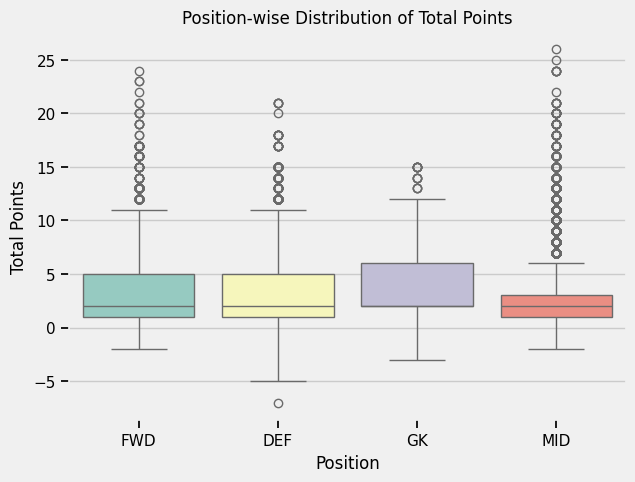

In [868]:
# Position-wise performance

sns.boxplot(x='position', y='total_points', data=master_cleaned, palette='Set3')
plt.title("Position-wise Distribution of Total Points")
plt.xlabel("Position")
plt.ylabel("Total Points")
plt.show()

This plot reveals the spread and consistency of points scored by players in different positions. The results showcase the variability within each position. 

Midfielders (MID) demonstrate the widest spread of points and the highest potential for top performance (indicated by outliers).
Defenders (DEF) and Goalkeepers (GK) have tighter distributions, reflecting more consistent, yet limited scoring opportunities.
Forwards (FWD) cluster near the median but with occasional high outliers due to exceptional performances.

This distinction makes exploring these metrics pivotal.

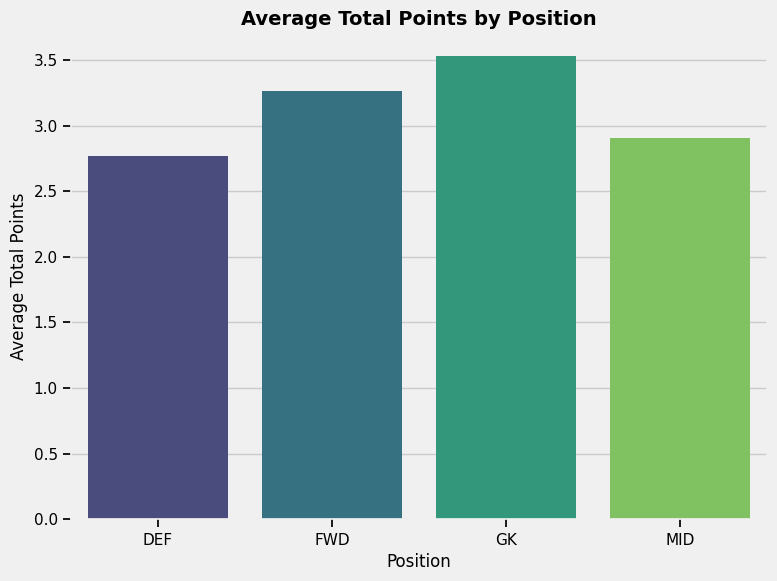

In [869]:
# Group data by position and calculate average total points
avg_points_per_position = master_cleaned.groupby('position')['total_points'].mean().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='position', y='total_points', data=avg_points_per_position, palette='viridis')
plt.title("Average Total Points by Position", fontsize=14, fontweight='bold')
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Total Points", fontsize=12)
plt.show()

This bar chart provides the average total points scored by players in each position (DEF, FWD, GK, MID). Goalkeepers (GK) score the highest average points among positions, likely due to consistent points from saves and clean sheets. Forwards (FWD) follow closely, as their scoring relies heavily on goals and assists. Defenders (DEF) and Midfielders (MID) show relatively lower average points, though MID often contributes to goals and assists as well.

The bar chart is good for quick comparisons of average performance across positions, ideal for an overview. The box plot complements this by providing a deeper analysis of variability and extremes, useful for identifying positions with the most variability (e.g., MID). Together, these visuals offer a comprehensive understanding of player performance trends by position.

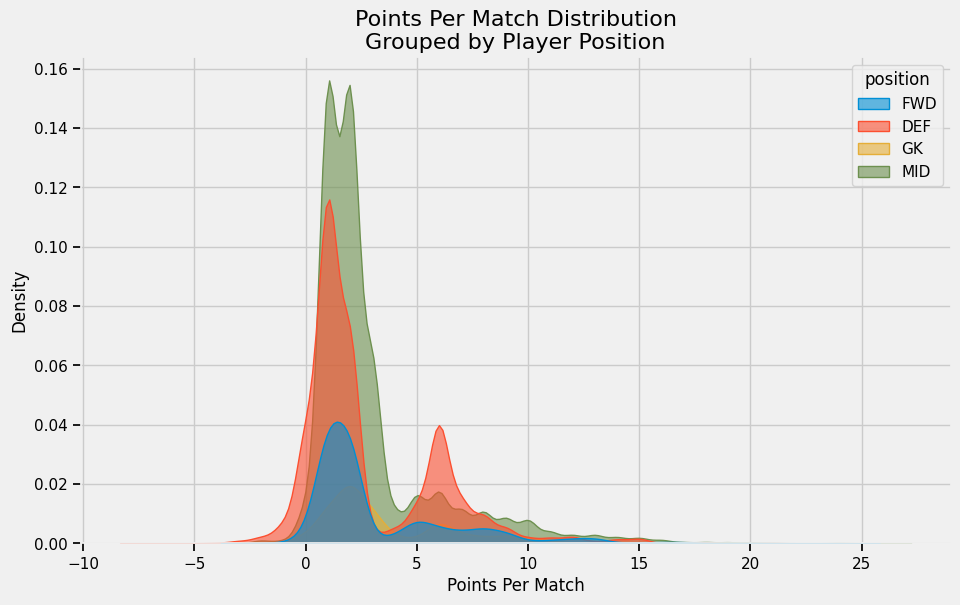

In [870]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=master_cleaned, x='total_points', hue='position', fill=True, alpha=0.6)

plt.title("Points Per Match Distribution\nGrouped by Player Position", fontsize=16)
plt.xlabel("Points Per Match", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()


Density plot shows distribution of points per match for players grouped by their respective positions. We can see that mids have highest density of ppm (suggests they are super consistent with returns). Defs and Fwds have similar distribution but with a wider spread - this suggests variability in returns. There appears to be second distinct peak for defenders that might be for full bakcs vs central defenders who have the chance of scoring returns. Wasnt feasible to split defenders into Cbs vs Fbs so hard to assess second defence peak. GKs have disntict narrow distribution which highlights their specialized role (they only get returns when they keep clean sheet and have neglibile avenues to score points beyond clean sheets)

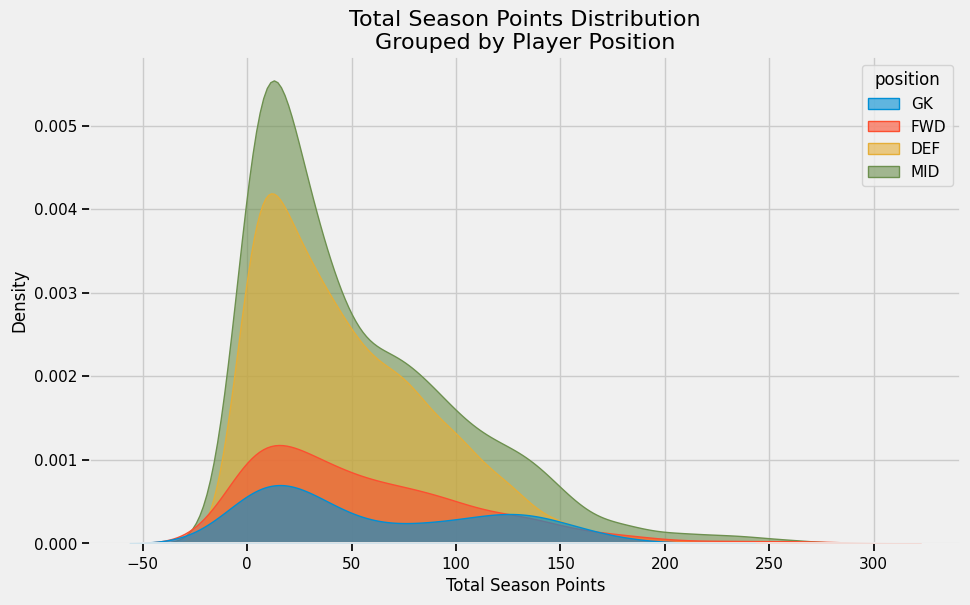

In [871]:
# Calculate the total points per season for each player
season_points = master_cleaned.groupby(['name', 'position', 'Season'])['total_points'].sum().reset_index()

# Define the order of positions for plotting
position_order = ['GK', 'FWD', 'DEF', 'MID']

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=season_points,
    x='total_points',
    hue='position',
    hue_order=position_order,  # Control the order of positions
    fill=True,
    alpha=0.6
)

plt.title("Total Season Points Distribution\nGrouped by Player Position", fontsize=16)
plt.xlabel("Total Season Points", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()


This density plot shows distribution of total season points by players grouped acording to their positions. plot is right skewed which highlights elite players across all positions - but specifically mids and fwds who typically have highest total season points amongst all players. (Also more Mids score > 150 points than forwards) suggesting it might be worthwile incesting in premium mids over premium forwards. 

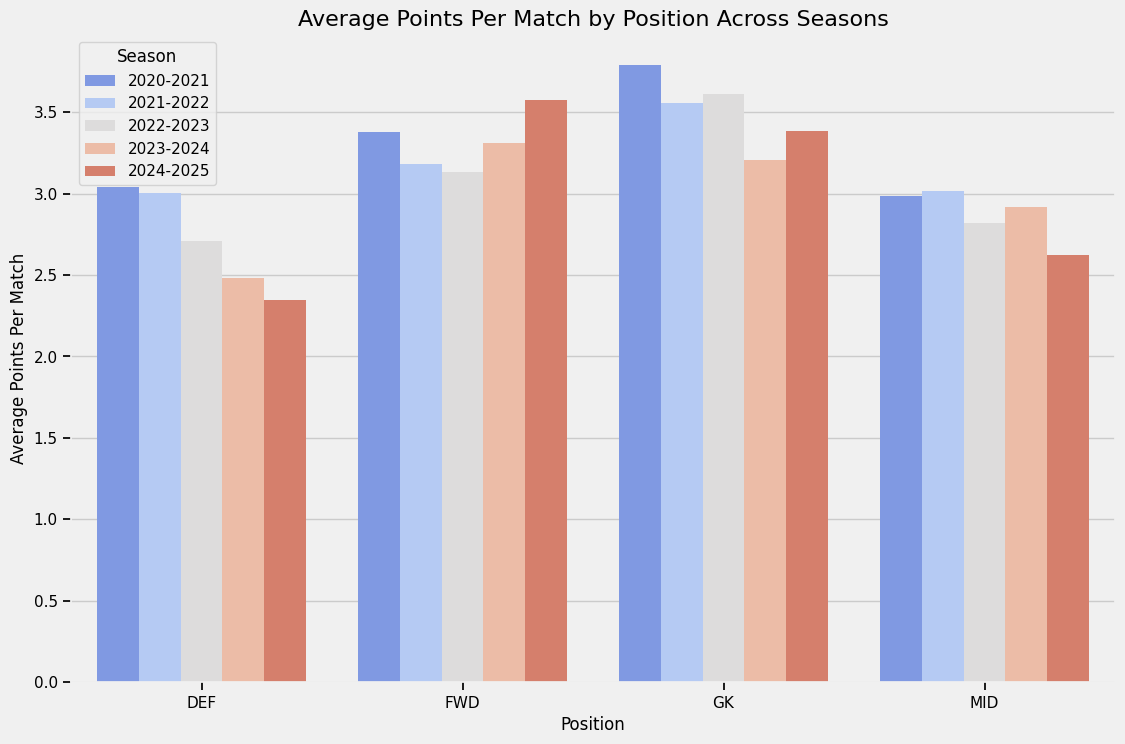

In [872]:
avg_points_per_match = master_cleaned.groupby(['Season', 'position'])['total_points'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_points_per_match, x='position', y='total_points', hue='Season', palette='coolwarm')

plt.title("Average Points Per Match by Position Across Seasons", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Points Per Match", fontsize=12)
plt.legend(title="Season", loc='upper left')

plt.show()


Bar plot showing avg poitns per match for players across different positions and seasons. GKs appear to be most consistent in point returns suggesting they chug along the whole season whereas other positions likely have higher weekly variance as they score more cumulatively over the season vs GKs. Defenders in particular appear to be struggling in recent years (a trend which makes sense as we are seeing fewer and fewer clean sheets every season) @TEAM - let me know if we need to show this ananlytically as this is my domain knowledge. 

Similarly, midfielders appear to not only be consistent but also have higher points cielings as they have the highest density for most seasom points (fat tail in fig above). Finally recent scoring changes to bonus points system is seen in the forwards achieving higher points per match.

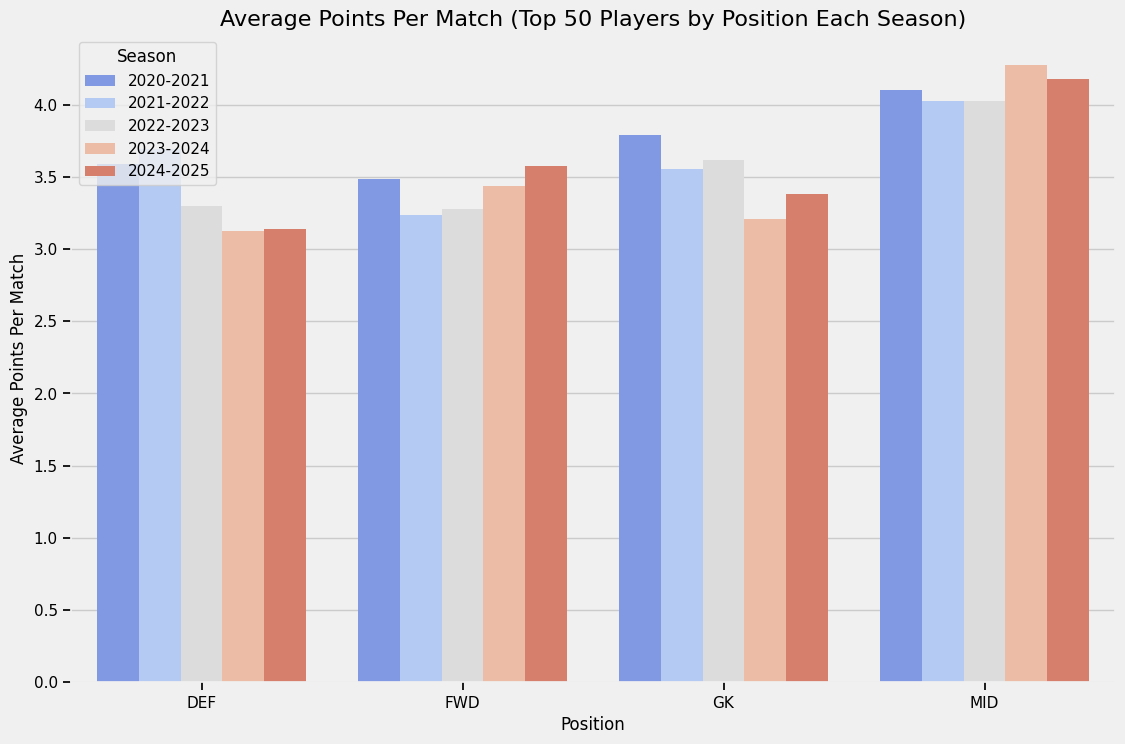

In [873]:
total_season_points = master_cleaned.groupby(['name', 'position', 'Season'])['total_points'].sum().reset_index()

N = 50  # N here represents top N players by position
top_n_players_season = (total_season_points.groupby(['Season', 'position']).apply(lambda group: group.nlargest(N, 'total_points')).reset_index(drop=True))

# calculateing avg points per match (PPM) for top N players + mergie with OG df to estimate PPM
merged_top_n = master_cleaned.merge(top_n_players_season[['name', 'Season', 'position']], on=['name', 'Season', 'position'], how='inner')

avg_points_top_n = merged_top_n.groupby(['Season', 'position'])['total_points'].mean().reset_index() # estatmatign average PPM for top N players

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_points_top_n, x='position', y='total_points', hue='Season', palette='coolwarm')

plt.title(f"Average Points Per Match (Top {N} Players by Position Each Season)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Points Per Match", fontsize=12)
plt.legend(title="Season", loc='upper left')

plt.show()


No real comments here just looking at plot above for top players

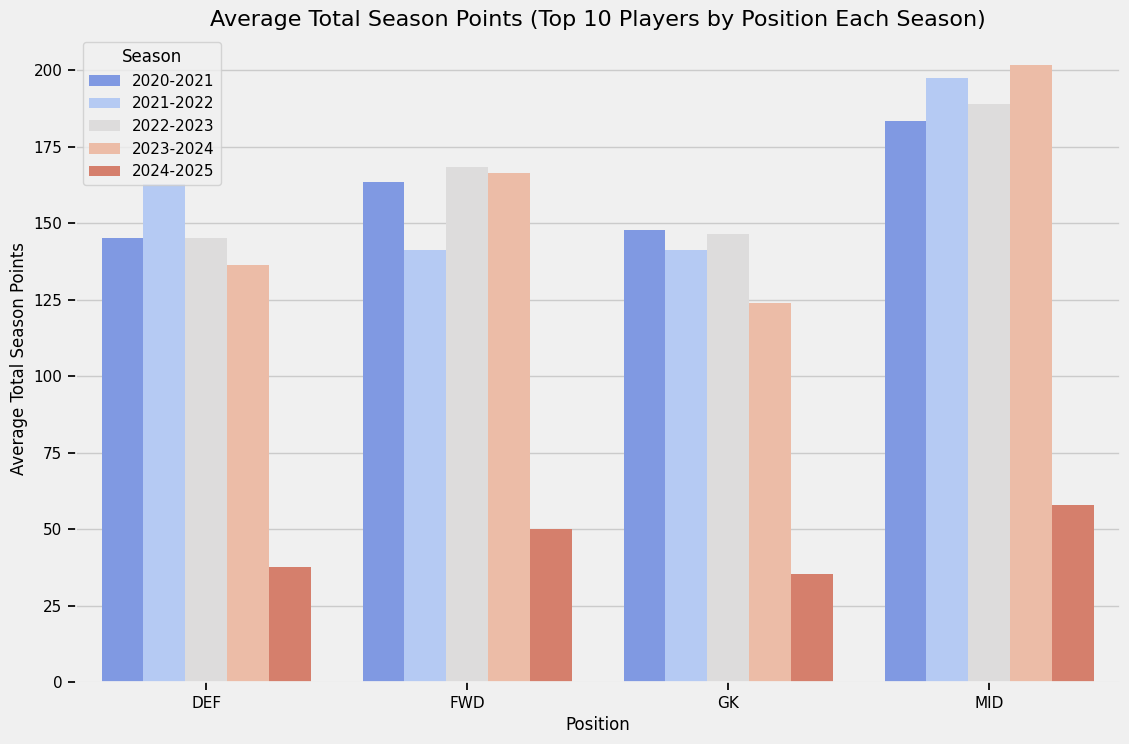

In [874]:
total_season_points = master_cleaned.groupby(['name', 'position', 'Season'])['total_points'].sum().reset_index()

N = 10  # this does exaclty same as above
top_n_players_season = (total_season_points.groupby(['Season', 'position']).apply(lambda group: group.nlargest(N, 'total_points')).reset_index(drop=True))

avg_total_points_top_n = top_n_players_season.groupby(['Season', 'position'])['total_points'].mean().reset_index() #again same calcs here 

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_total_points_top_n, x='position', y='total_points', hue='Season', palette='coolwarm')

plt.title(f"Average Total Season Points (Top {N} Players by Position Each Season)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Total Season Points", fontsize=12)
plt.legend(title="Season", loc='upper left')

plt.show()


In [875]:
top_n_players_season

,name,position,Season,total_points
0,Stuart Dallas,DEF,2020-2021,171
1,Andrew Robertson,DEF,2020-2021,161
2,Trent Alexander-Arnold,DEF,2020-2021,160
3,Aaron Cresswell,DEF,2020-2021,153
4,Aaron Wan-Bissaka,DEF,2020-2021,144
5,Ben Chilwell,DEF,2020-2021,139
6,Matt Targett,DEF,2020-2021,138
7,Lewis Dunk,DEF,2020-2021,130
8,John Stones,DEF,2020-2021,128
9,Tyrone Mings,DEF,2020-2021,128


In [876]:
master_cleaned['value'].describe()

count    42938.000000
mean         5.421533
std          1.396305
min          3.600000
25%          4.500000
50%          5.000000
75%          5.700000
max         15.400000
Name: value, dtype: float64

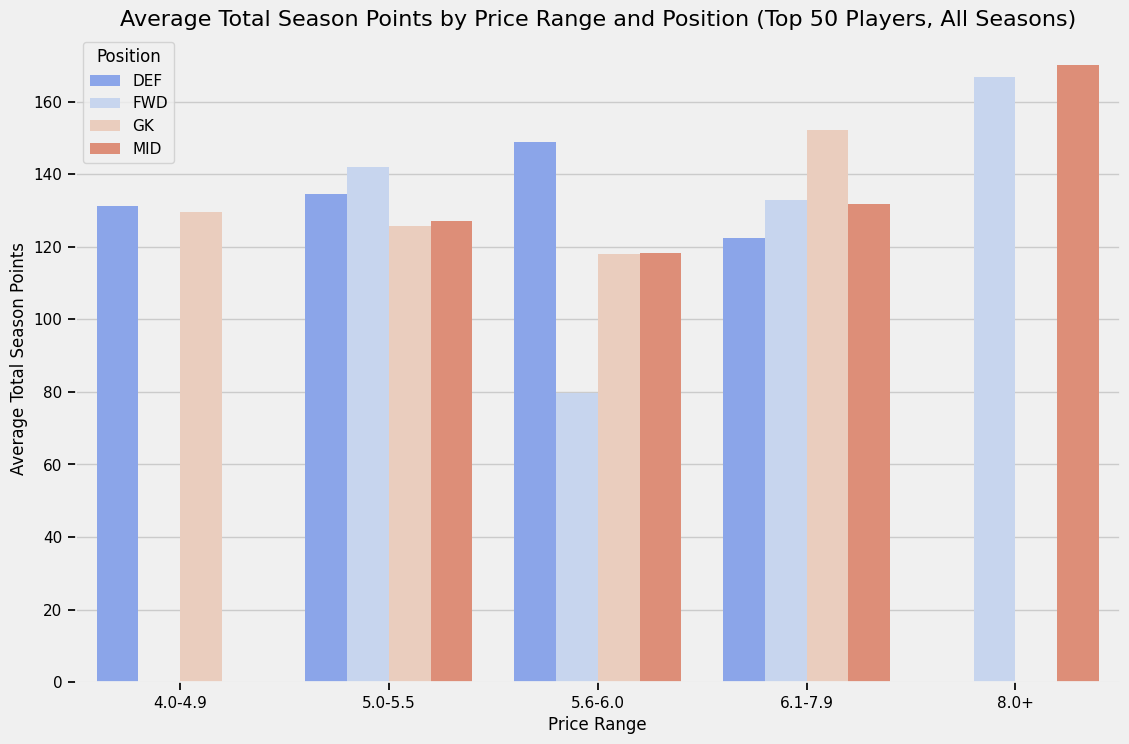

In [877]:
price_bins = [3.5, 4.9, 5.5, 6.0, 7.9, 15.5] #defining price bins and labels for our data
price_labels = ["4.0-4.9", "5.0-5.5", "5.6-6.0", "6.1-7.9", "8.0+"]
master_cleaned['price_range'] = pd.cut(master_cleaned['value'], bins=price_bins, labels=price_labels, right=False)

#players prices change throughout the season si we choose price in the first GW of the sewasoon 
start_of_season_prices = (master_cleaned.sort_values(['Season', 'GW']).groupby(['name', 'position', 'Season'])['price_range'].first().reset_index())

total_season_points = (master_cleaned.groupby(['name', 'position', 'Season'])['total_points'].sum().reset_index()) #calculating total season points for each player

total_season_points = total_season_points.merge(start_of_season_prices, on=['name', 'position', 'Season'], how='left') # mergin start-of-season price range into the total_season_points DataFrame

N = 50  # yall know what this is by now
top_n_players_season = (total_season_points.groupby(['Season']).apply(lambda group: group.nlargest(N, 'total_points')).reset_index(drop=True))

avg_points_by_price_position = (top_n_players_season.groupby(['price_range', 'position'])['total_points'].mean().reset_index()) # calculating avg total season points for each price bin and position across seasons

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_points_by_price_position,x='price_range',y='total_points',hue='position',palette='coolwarm')

plt.title(f"Average Total Season Points by Price Range and Position (Top {N} Players, All Seasons)", fontsize=16)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Average Total Season Points", fontsize=12)
plt.legend(title="Position", loc='upper left')

plt.show()


Bar plot shows the average total season points for the top 50 players, grouped by price range and position, aggregated across all seasons. Mids and forward are never prices at the first bins (even when they exceptionally are they never start so thats why you dont see any of either in first bin). Similarly GKs abd DFs are never prviced in the premium 8mil + range (typically dominated by Mids and Fwds). High pruce defenders tyipcally outperform mid priced mids and fwds (5.6 - 6 mil bracket). Preimum mids and fwds score significantly more points, reflecting their premium cost and contribution.

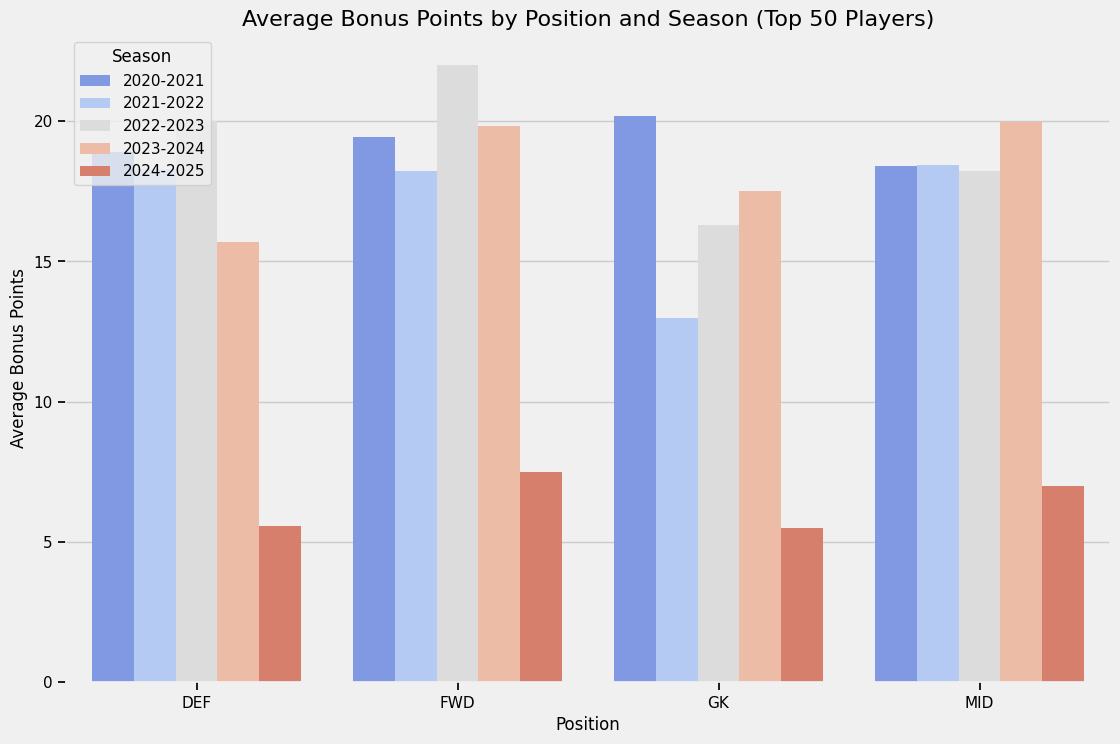

In [878]:
total_season_bonus = (master_cleaned.groupby(['name', 'position', 'Season'])['bonus'].sum().reset_index())

N = 50  
top_n_players_season = (total_season_bonus.groupby(['Season']).apply(lambda group: group.nlargest(N, 'bonus')).reset_index(drop=True))

bonus_points_by_position = (top_n_players_season.groupby(['Season', 'position'])['bonus'].mean().reset_index()) #aggregating bonus points by position and season for top 'N' players (note: this changes o/p)

plt.figure(figsize=(12, 8))
sns.barplot(data=bonus_points_by_position,x='position',y='bonus',hue='Season',palette='coolwarm')

plt.title(f"Average Bonus Points by Position and Season (Top {N} Players)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Average Bonus Points", fontsize=12)
plt.legend(title="Season", loc='upper left')

plt.show()


# Step 2: Key Metric Correlations for Players Performance

The following sections include heatmaps of the key metrics and their importance with regards to the players performance.

# Add Shahids heatmap of variable correlations (colinearity check) here.

Shahid comments about the large heatmap.

In [879]:
master_cleaned_copy = master_cleaned.copy()

master_cleaned_copy["kickoff_time"] = pd.to_datetime(master_cleaned_copy["kickoff_time"])
master_cleaned_copy["season"] = master_cleaned_copy["kickoff_time"].apply(lambda x: f"{x.year}/{x.year + 1}" if x.month >= 8 else f"{x.year - 1}/{x.year}")

# we need to group players into bins
position_bins = {
    "GK": "Goalkeepers",
    "DEF": "Defenders",
    "MID": "Midfielders",
    "FWD": "Forwards",
}

master_cleaned_copy["position_bin"] = master_cleaned_copy["position"].map(position_bins) # now mapping positions to bins

#grouping by seaosn and posiiton bins
grouped = master_cleaned_copy.groupby(["season", "position_bin"]).agg({"name": "count", "xP": "mean"}).rename(columns={"name": "player_count", "xP": "avg_xP"}).reset_index()

print(grouped)

       season position_bin  player_count    avg_xP
0   2020/2021    Defenders          3161  2.750854
1   2020/2021     Forwards          1244  3.021624
2   2020/2021  Goalkeepers           709  3.711142
3   2020/2021  Midfielders          4139  2.821889
4   2021/2022    Defenders          3194  3.100423
5   2021/2022     Forwards          1258  3.087043
6   2021/2022  Goalkeepers           724  3.933218
7   2021/2022  Midfielders          4236  3.079072
8   2022/2023    Defenders          3608  2.595926
9   2022/2023     Forwards          1384  2.982117
10  2022/2023  Goalkeepers           769  3.557802
11  2022/2023  Midfielders          5085  2.730610
12  2023/2024    Defenders          3678  2.354323
13  2023/2024     Forwards          1333  3.091860
14  2023/2024  Goalkeepers           772  3.086593
15  2023/2024  Midfielders          5009  2.740397
16  2024/2025    Defenders           856  2.287675
17  2024/2025     Forwards           290  3.080345
18  2024/2025  Goalkeepers     

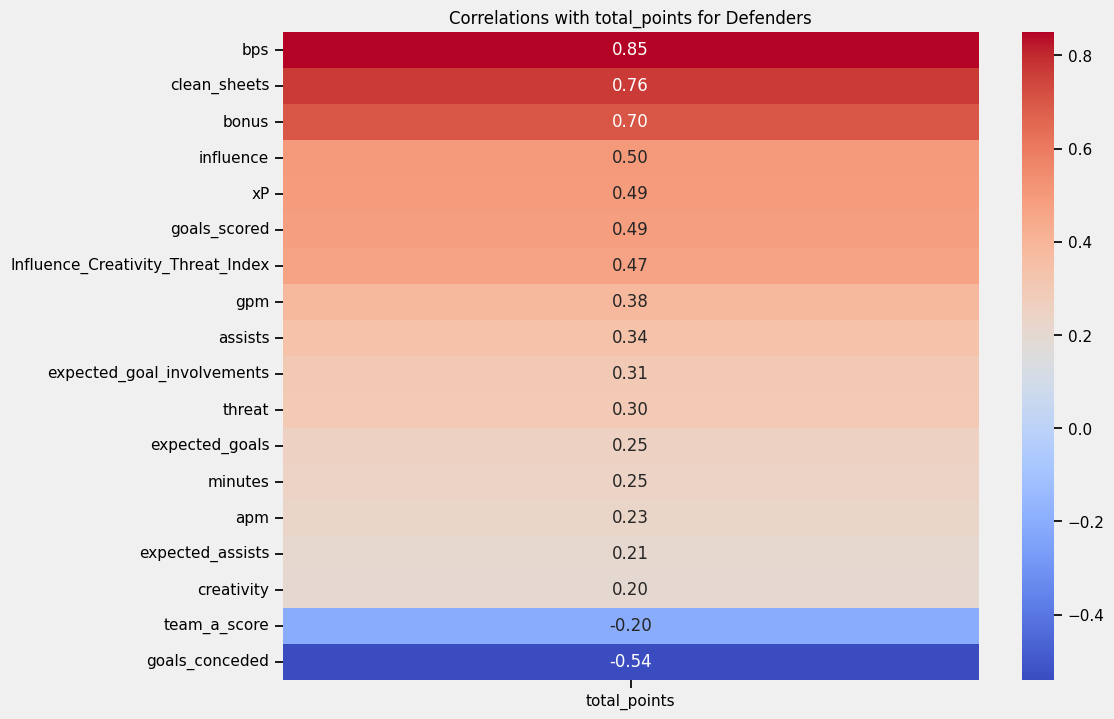

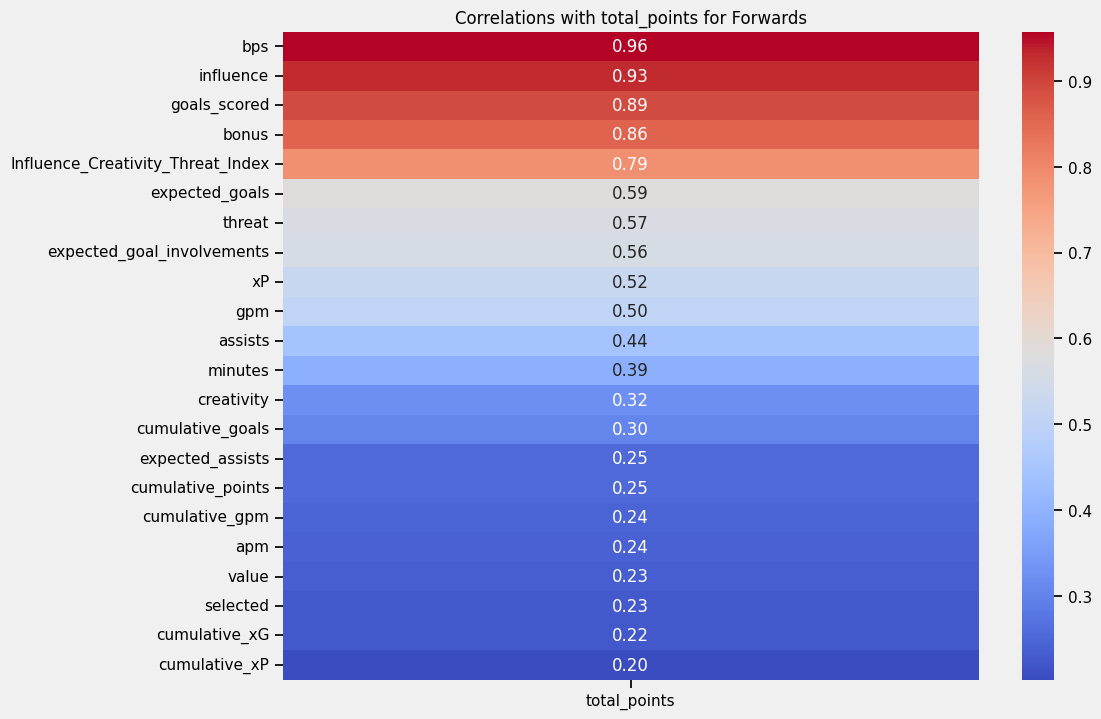

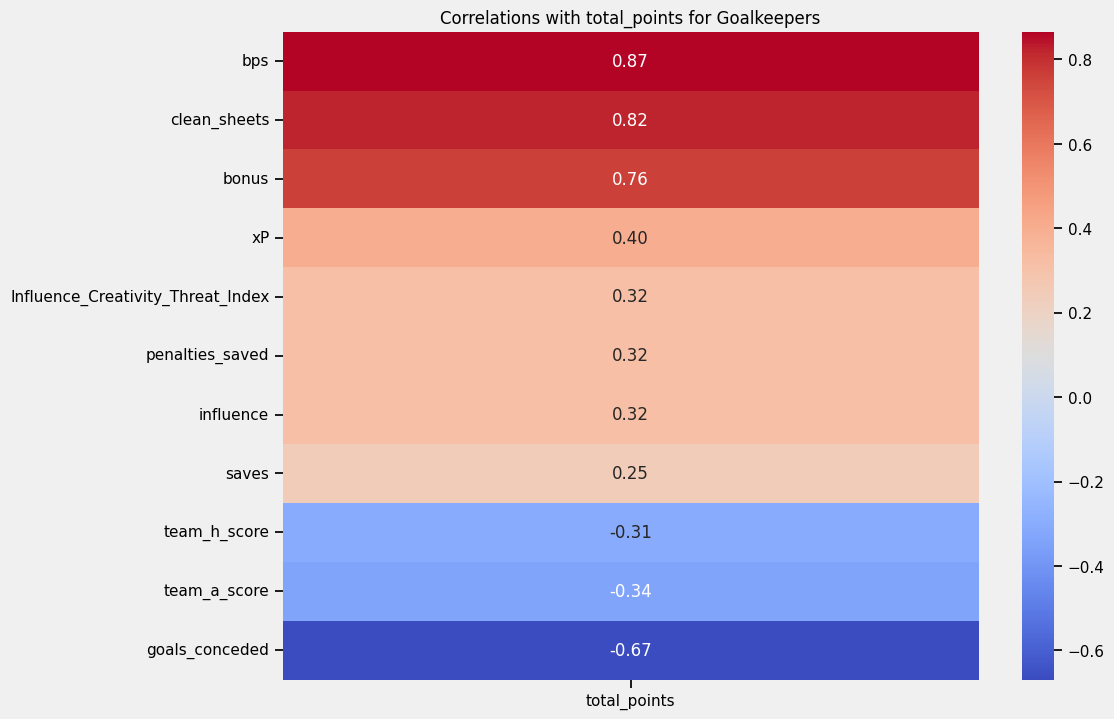

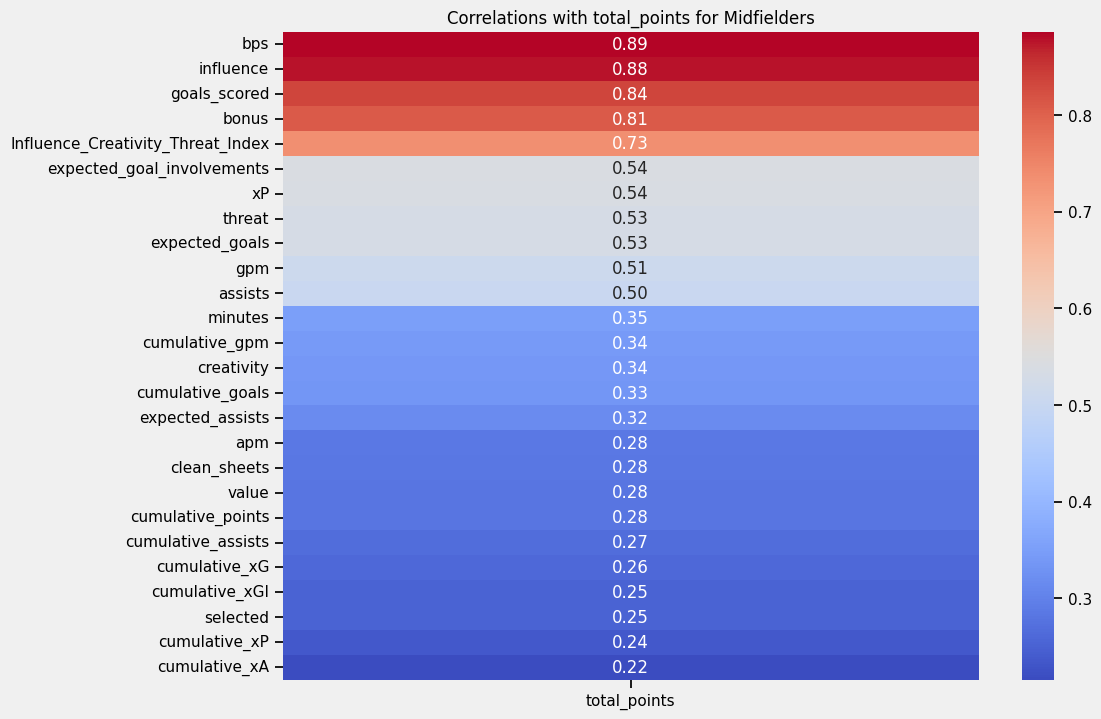

In [880]:
master_cleaned_copy["was_home"] = master_cleaned_copy["was_home"].apply(lambda x: 1 if x == True else 0)  # hot encoding `was_home`
 
master_cleaned_copy = master_cleaned_copy.drop(columns=["name", "position", "team"])  # dropping categorical columns
 
target = "total_points"  
threshold = 0.2  # seetting the correlation threshold
 
for position, group in master_cleaned_copy.groupby("position_bin"):
    numeric_data = group.select_dtypes(include=["float64", "int64"])
    
    correlation = numeric_data.corr()[target].sort_values(ascending=False)
    
    correlation = correlation.drop(target)
    
    correlation = correlation[correlation.abs() > threshold] # filtering correlations by the threshold
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True, yticklabels=correlation.index)
    plt.title(f"Correlations with {target} for {position}")
    
    plt.show()

Interesting - we see that differnt independent variables are more highly correlated across positions which makes sense as GKs and defenders rely on clean sheets (Gk also rely on saves for poijnts). Whereas mids and forwards rely on goals and assists with fwds having stronger correlation for goal scored and mids for assists 

The following heatmap is more focused showing the correlations between specific performance-related metrics.

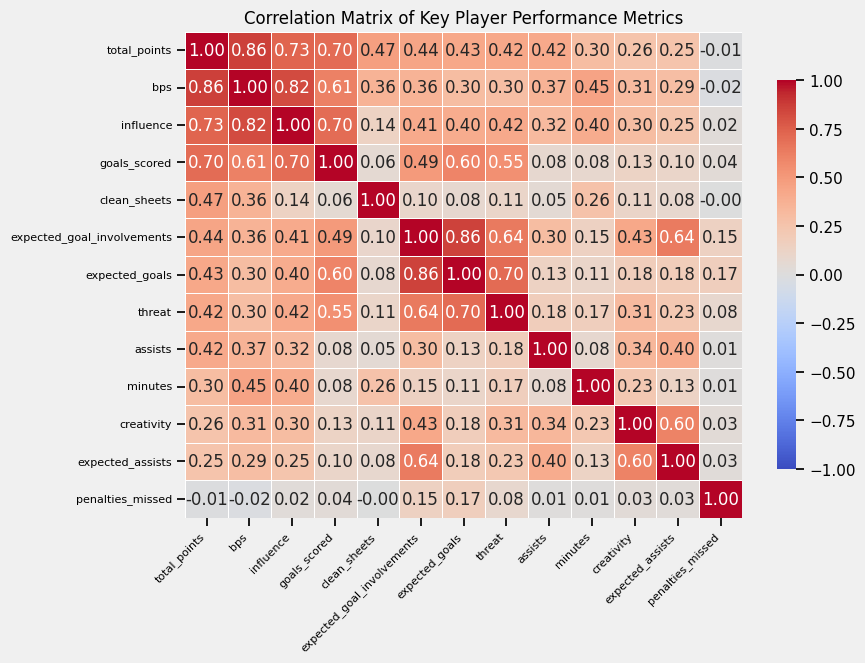

In [881]:
# Filter and reorganize the dataset for relevant features
selected_columns = [
    'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists',
    'expected_goal_involvements', 'clean_sheets', 'minutes', 'penalties_missed',
    'influence', 'creativity', 'threat', 'bps'
]
copy = master_cleaned[selected_columns]

# Compute the correlation matrix
correlation_matrix = copy.corr()

# Sort the matrix by correlation with 'total_points'
correlation_matrix = correlation_matrix.sort_values(by='total_points', ascending=False, axis=0)
correlation_matrix = correlation_matrix.sort_values(by='total_points', ascending=False, axis=1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
    vmin=-1, vmax=1, cbar_kws={"shrink": 0.8}, linewidths=0.5
)
plt.title("Correlation Matrix of Key Player Performance Metrics", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The metric 'total_points' has strong correlations with 'bps' (bonus points system), 'goals_scored', and 'influence'. This indicates these are the primary drivers of a player's overall FPL performance.

Metrics like 'penalties_missed' and 'yellow_cards' show little to no correlation with total_points, suggesting they have a minimal impact.

Advanced metrics like 'expected_goal_involvements' and 'expected_goals' show strong relationships with 'goals_scored' and 'total_points', validating their predictive value for future performance.

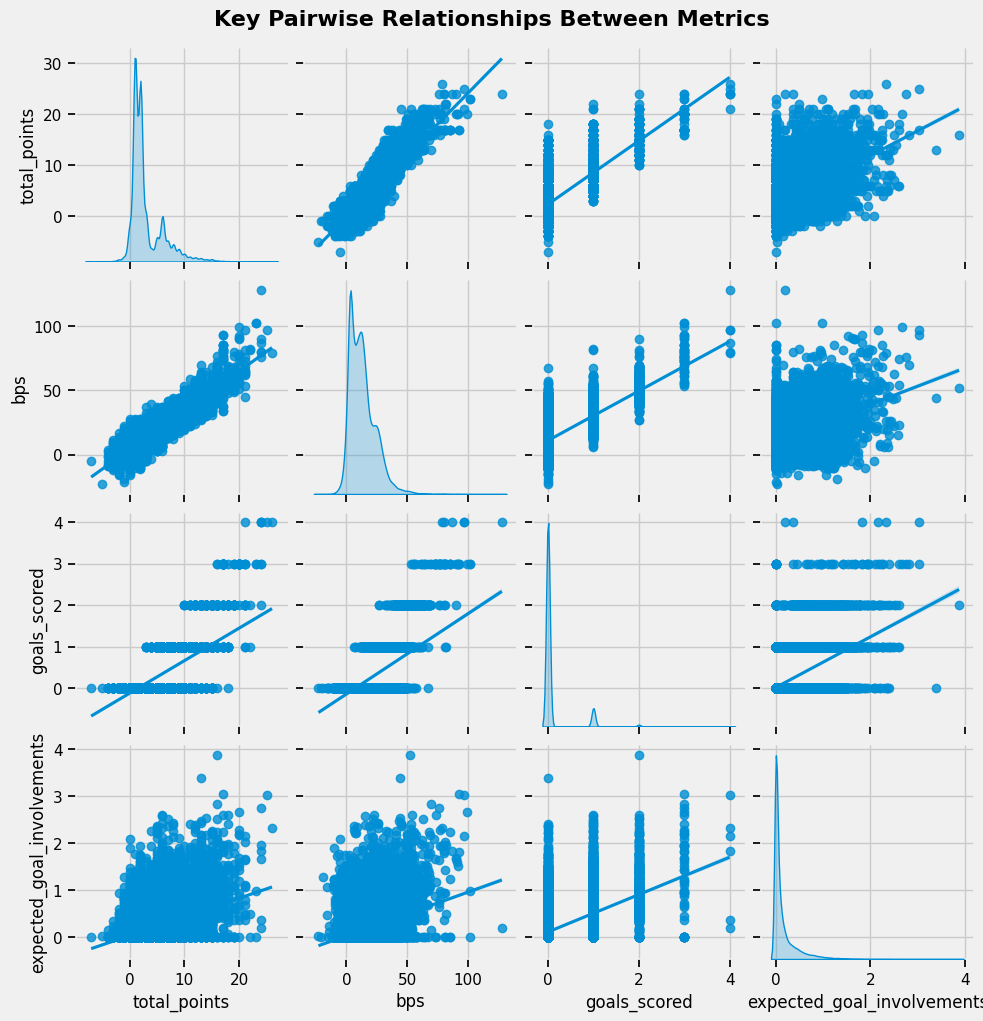

In [882]:
# Select key metrics for pairwise relationships
pairwise_metrics = ['total_points', 'bps', 'goals_scored', 'expected_goal_involvements']
sns.pairplot(master_cleaned[pairwise_metrics], kind='reg', diag_kind='kde', palette='coolwarm')
plt.suptitle("Key Pairwise Relationships Between Metrics", y=1.02, fontsize=16, fontweight='bold')
plt.show()

Insights from the pairwise relationships:
1. Total points and BPS shows a positive linear relationship. BPS is a strong indicator of total points as it reflects a player's overall contribution in a match (tackles, passes, etc.).
2. Total points increase with goals scored, as goals directly contribute to a player's point tally.
3. Total points and expected goal involvments correlation is less linear, as not all points come from goals (e.g. clean sheets or assists also contribute).
4. BPS and expected goal involvments show some positive association, but not as strong as other indicators.
5. Goals Scored and Expected Goal Involvements show a moderate linear correlation. Players who score more tend to have higher xG/xA metrics.

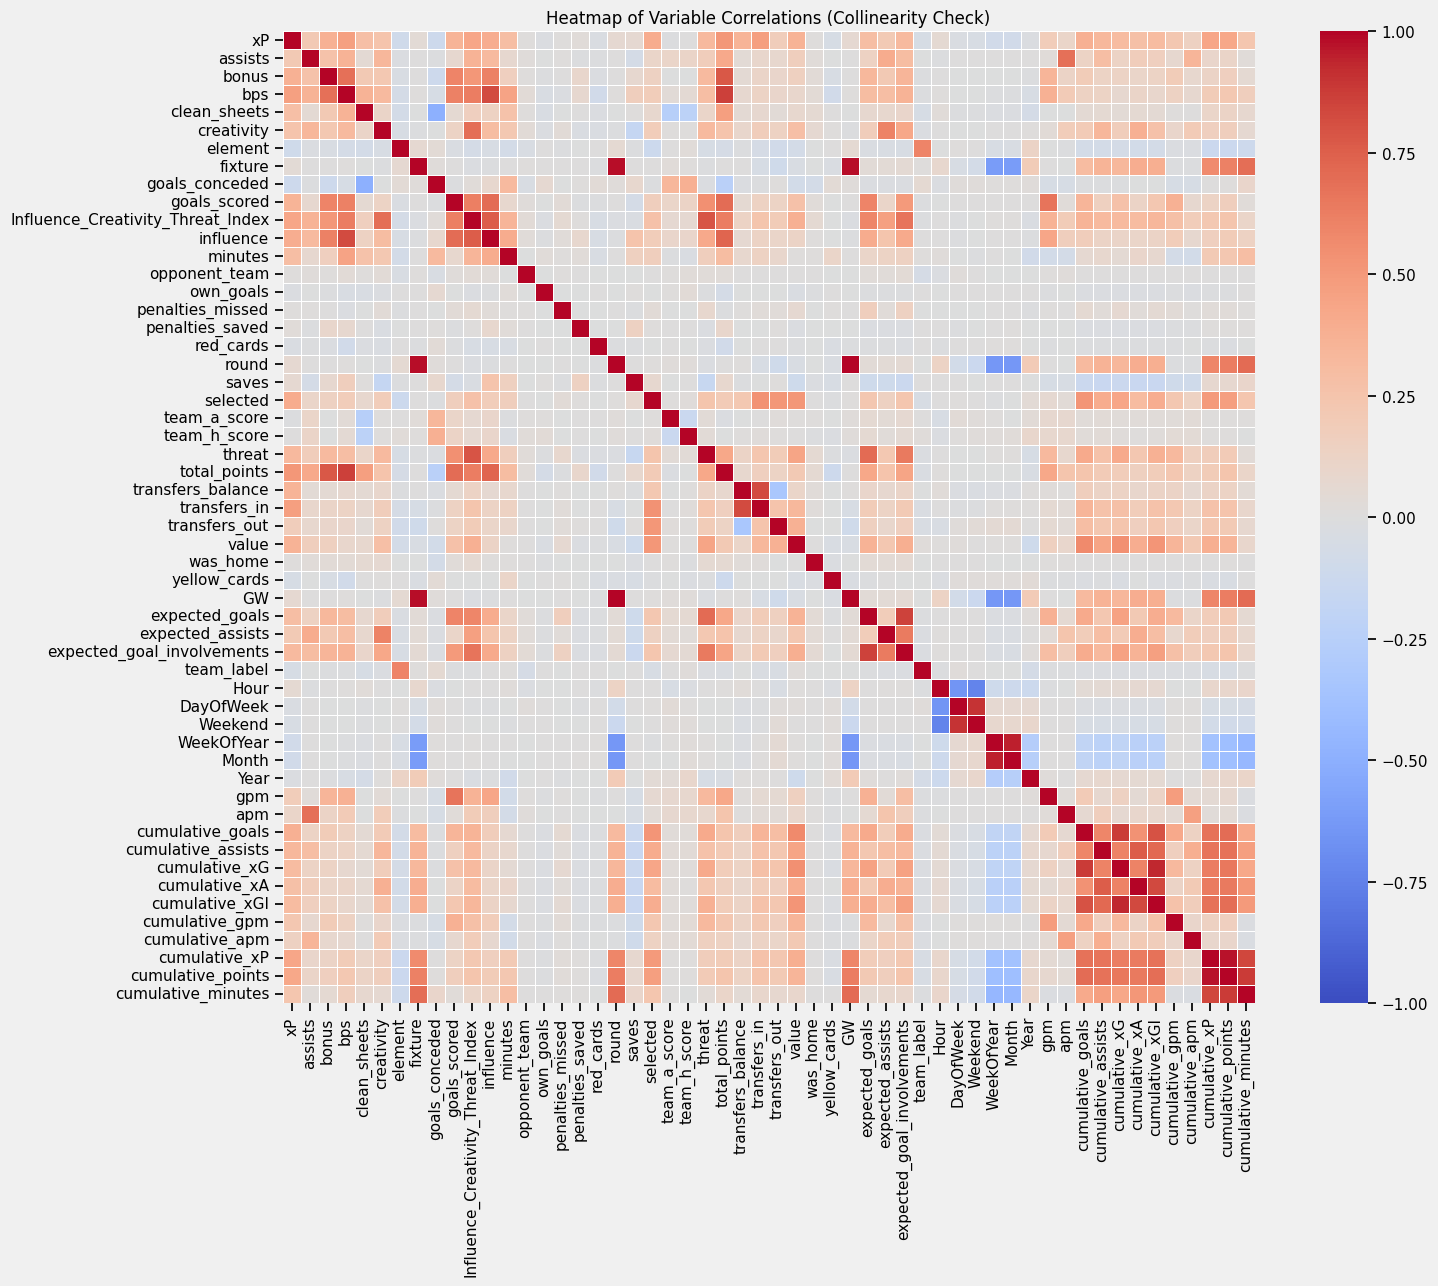

In [883]:
numeric_data = master_cleaned_copy.select_dtypes(include=["float64", "int64"])
 
correlation_matrix = numeric_data.corr() #calculating the correlatio matrix
 
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix,annot=False, cmap="coolwarm",center=0,vmin=-1,vmax=1,square=True,linewidths=0.5,)
plt.title("Heatmap of Variable Correlations (Collinearity Check)")
 
plt.show()

# Step 3: Exploring Match-Level Data

Examining home versus away performance and key match metrics reveals the contextual factors influencing player output.

This analysis provides insights into how match location and key game events contribute to total points.

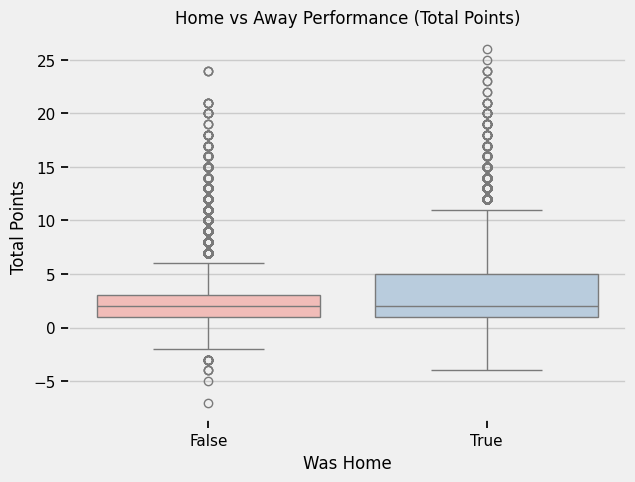

In [884]:
# Home vs Away performance
sns.boxplot(x='was_home', y='total_points', data=master_cleaned, palette='Pastel1')
plt.title("Home vs Away Performance (Total Points)")
plt.xlabel("Was Home")
plt.ylabel("Total Points")
plt.show()

Home advantage is evident from higher average and median points at home. Such insights can influence fantasy team captain choices, particularly for home matches.

Later on, we can see that some players perform better on average at home matches than away and vice versa, which can help make better decisions about players to choose for the FPL.

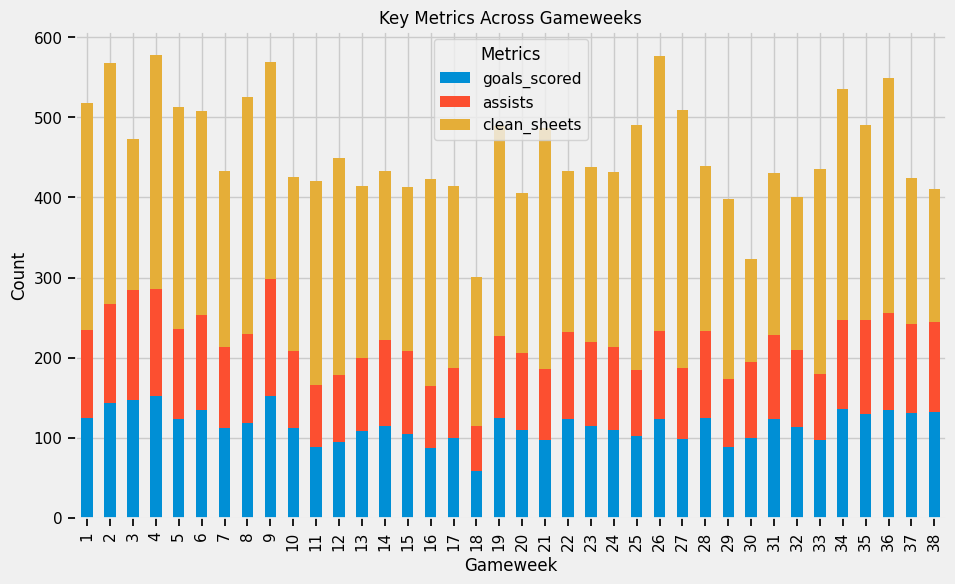

In [885]:
# Key event metrics across gameweeks
gameweek_metrics = master_cleaned.groupby('GW')[['goals_scored', 'assists', 'clean_sheets']].sum()
gameweek_metrics.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Key Metrics Across Gameweeks")
plt.xlabel("Gameweek")
plt.ylabel("Count")
plt.legend(title="Metrics")
plt.show()

Clean sheets are the most consistent contributor, suggesting defenders and goalkeepers with a good clean sheet record are valuable.
The goals_scored metric is the shortest, which indicates that goals are the rarest event in a football match compared to assists or clean sheets.
Fantasy football managers often use gameweek trends to plan their transfers and team strategies.

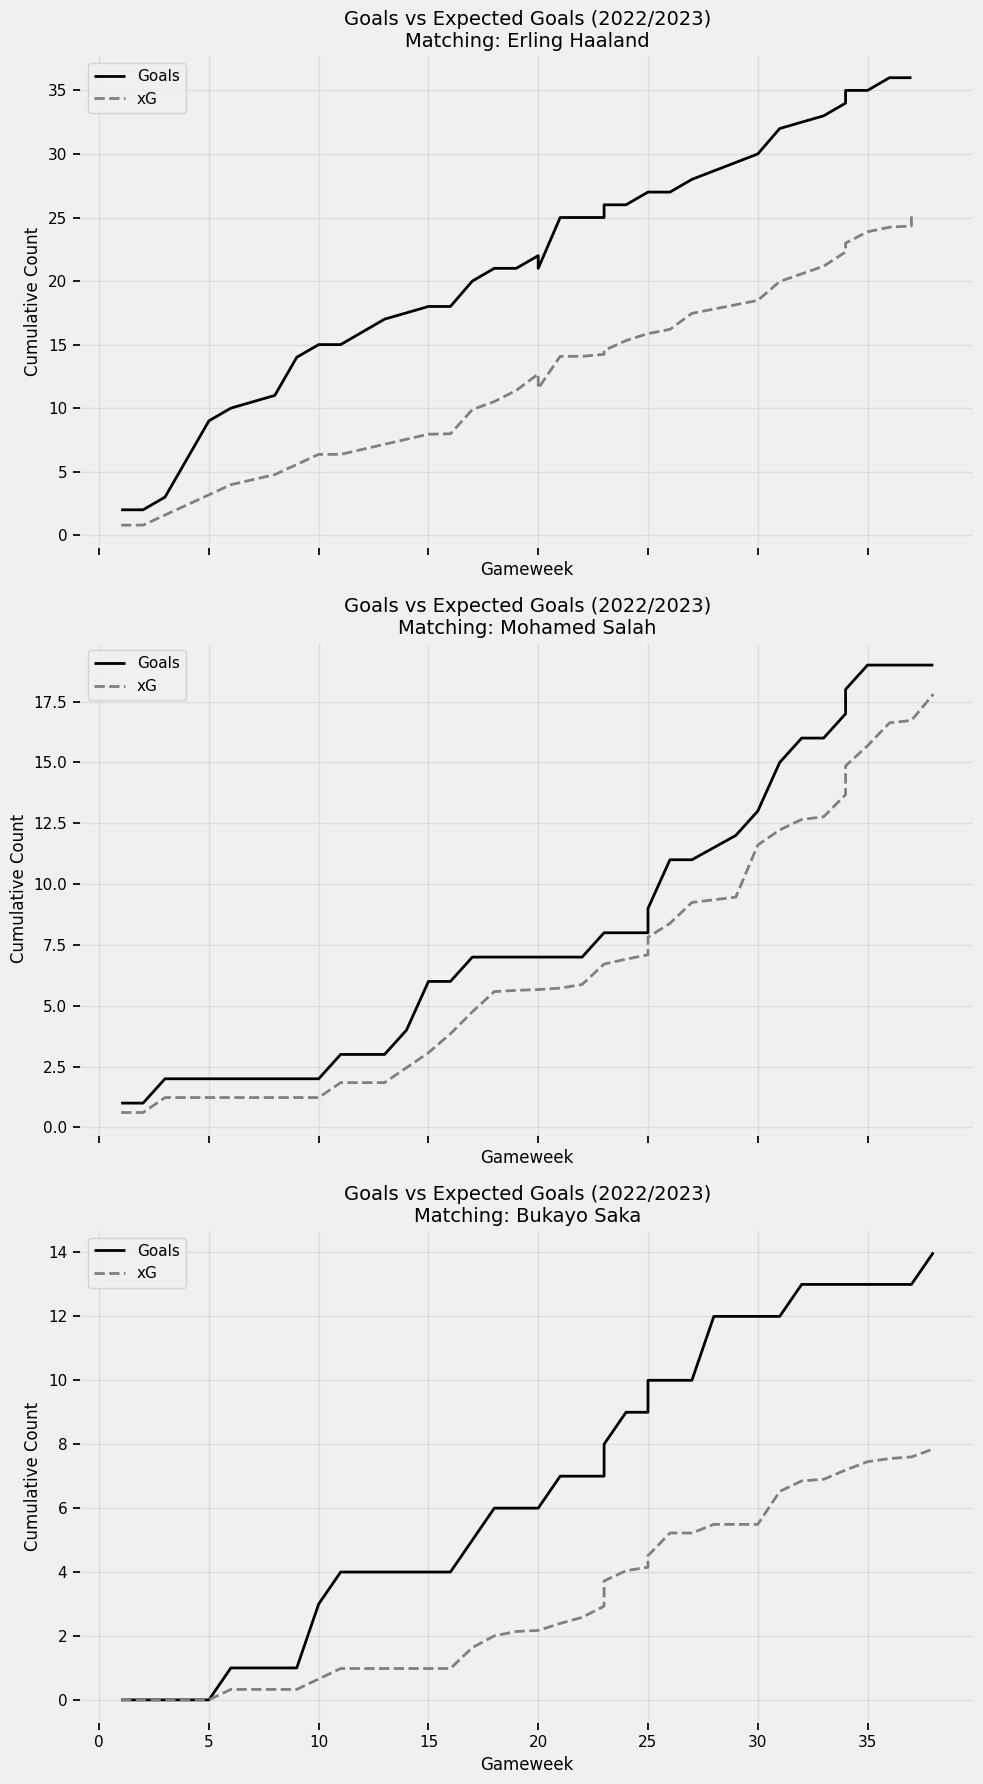

In [886]:
def plot_multiple_players_xg_vs_goals(player_names, season):
    num_players = len(player_names)
    fig, axes = plt.subplots(num_players, 1, figsize=(10, 6 * num_players), sharex=True)
 
    if num_players == 1:
        axes = [axes]  # Ensure axes is a list even for a single player

    for idx, player_name in enumerate(player_names):
        player_data = master_cleaned[(master_cleaned['name'].str.contains(player_name, case=False, na=False)) & (master_cleaned_copy['season'] == season)] #filtering for player and season across 2 dfs
 
        player_data = player_data.sort_values(by='GW') #sorting by GW
 
        # plotting cumulative xG vs goals for the current player
        ax = axes[idx]
        ax.plot(player_data['GW'], player_data['cumulative_goals'], label="Goals", color="black", linewidth=2)
        ax.plot(player_data['GW'], player_data['cumulative_xG'], label="xG", color="gray", linestyle="--", linewidth=2)
        ax.set_title(f"Goals vs Expected Goals ({season})\nMatching: {player_name}", fontsize=14)
        ax.set_xlabel("Gameweek")
        ax.set_ylabel("Cumulative Count")
        ax.legend()
        ax.grid(alpha=0.5)
 
    plt.tight_layout()
   
    plt.show()

player_names = ["Erling Haaland", "Mohamed Salah", "Bukayo Saka"]  # List (player names)
season = "2022/2023"  # season
plot_multiple_players_xg_vs_goals(player_names, season)



In [887]:
master_cleaned_copy.columns

Index(['xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored',
       'Influence_Creativity_Threat_Index', 'influence', 'kickoff_time',
       'minutes', 'opponent_team', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'position_DEF', 'position_FWD',
       'position_GK', 'position_MID', 'team_label', 'Hour', 'DayOfWeek',
       'Weekend', 'WeekOfYear', 'Month', 'Year', 'Season', 'gpm', 'apm',
       'cumulative_goals', 'cumulative_assists', 'cumulative_xG',
       'cumulative_xA', 'cumulative_xGI', 'cumulative_gpm', 'cumulative_apm',
       'cumulative_xP', 'cumulative_points', 'cumulative_minutes',
       'price_ran

# Step 4: Expected and Actual Performance Metrics

This step bridges the gap between predicted and realized performance, offering actionable insights for evaluating player reliability.

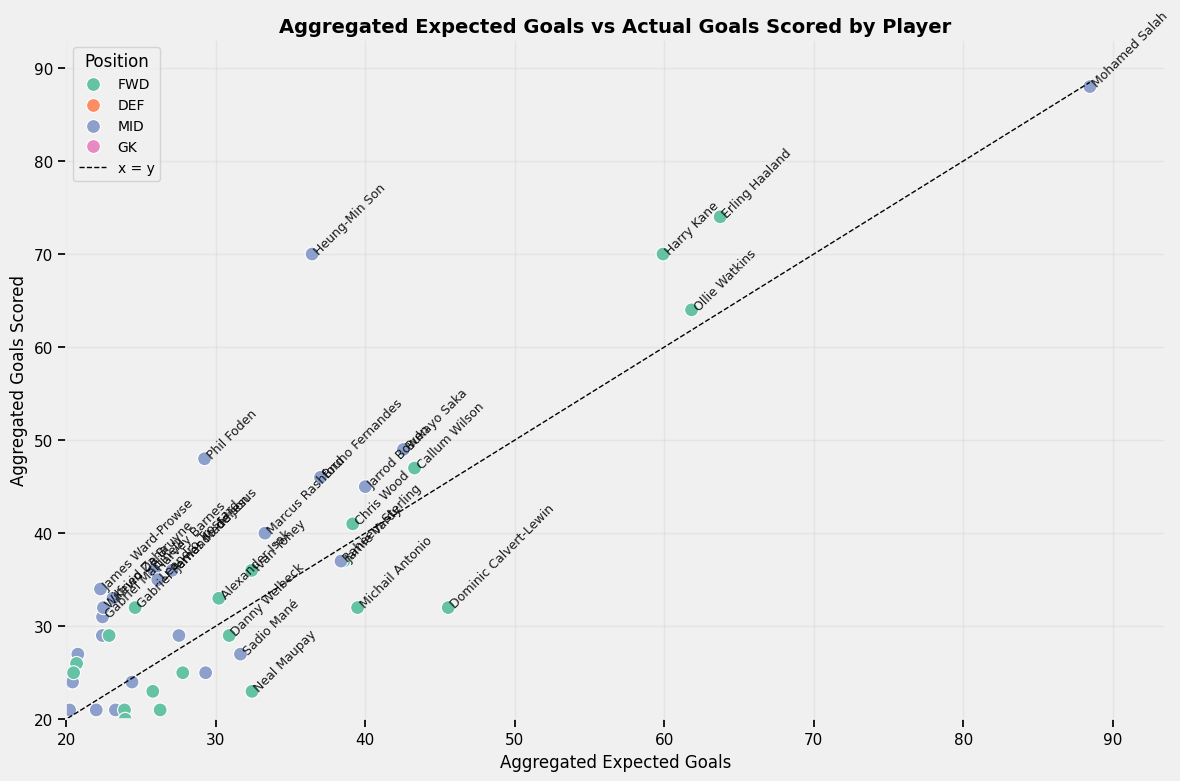

In [888]:
# Aggregate data to calculate total expected goals and actual goals scored
aggregated_data = master_cleaned.groupby(['name', 'position']).agg({
    'expected_goals': 'sum',  # Aggregating total expected goals
    'goals_scored': 'sum'    # Aggregating total goals scored
}).reset_index()

# Rename columns for clarity
aggregated_data.rename(columns={
    'expected_goals': 'Aggregated Expected Goals',
    'goals_scored': 'Actual Goals Scored'
}, inplace=True)

# Filter top performers based on Aggregated Expected Goals or Actual Goals Scored
top_performers = aggregated_data[
    (aggregated_data['Aggregated Expected Goals'] > 30) | 
    (aggregated_data['Actual Goals Scored'] > 30)
]

# Plotting the scatter plot with hue based on player position
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Aggregated Expected Goals', 
    y='Actual Goals Scored', 
    hue='position',  # 'position' column exists in the dataset
    data=aggregated_data, 
    edgecolor="w", 
    s=100,
    palette="Set2"
)

# Add a reference line for x = y
max_value = max(aggregated_data['Aggregated Expected Goals'].max(), 
                aggregated_data['Actual Goals Scored'].max())
plt.plot(
    [0, max_value], 
    [0, max_value], 
    'k--', linewidth=1, label="x = y"
)

# Annotate key performers (e.g., top scorers or outliers)
for _, row in top_performers.iterrows():
    plt.text(
        row['Aggregated Expected Goals'], 
        row['Actual Goals Scored'], 
        row['name'],
        fontsize=9, 
        alpha=0.9,
        rotation=45
    )

# Add plot enhancements
plt.title("Aggregated Expected Goals vs Actual Goals Scored by Player", fontsize=14, fontweight='bold')
plt.xlabel("Aggregated Expected Goals", fontsize=12)
plt.ylabel("Aggregated Goals Scored", fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(20, aggregated_data['Aggregated Expected Goals'].max() + 5)
plt.ylim(20, aggregated_data['Actual Goals Scored'].max() + 5)
plt.legend(title="Position", fontsize=10)
plt.tight_layout()
plt.show()

- The trend depicted in this scatter plot provides a detailed comparison between aggregated expected goals (xG) and actual goals scored by players.
- Outliers above the line have significantly outperformed their xG, because of exceptional performances. Below the line most likely be players like defenders or goalkeepers scoring fewer goals.
- Players like Mohamed Salah, Erling Haaland, and Harry Kane are positioned near the top-right of the graph, indicating high values for both aggregated xG and actual goals scored.
- Ollie Watkins and Dominic Calvert-Lewin lie close to the x=y line, indicating they score as expected based on their xG, highlighting consistent performance without overperformance.

# Step 5: Penalty and Red Card Impact

The following trends are investigating penalties missed and red cards to assesses their negative impact on player scores and overall performance.

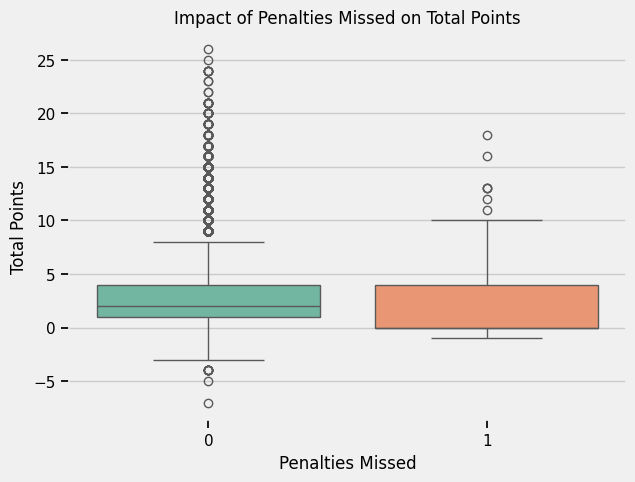

In [889]:
# Analyze penalties missed/saved impact
sns.boxplot(x='penalties_missed', y='total_points', data=master_cleaned, palette='Set2')
plt.title("Impact of Penalties Missed on Total Points")
plt.xlabel("Penalties Missed")
plt.ylabel("Total Points")
plt.show()

Players who missed a penalty (indicated by 1 on the x-axis) generally show a lower median 'total_points' than players who did not miss a penalty (indicated by 0 on the x-axis).
This could be because players who usually perform well are chosen to take these kicks.

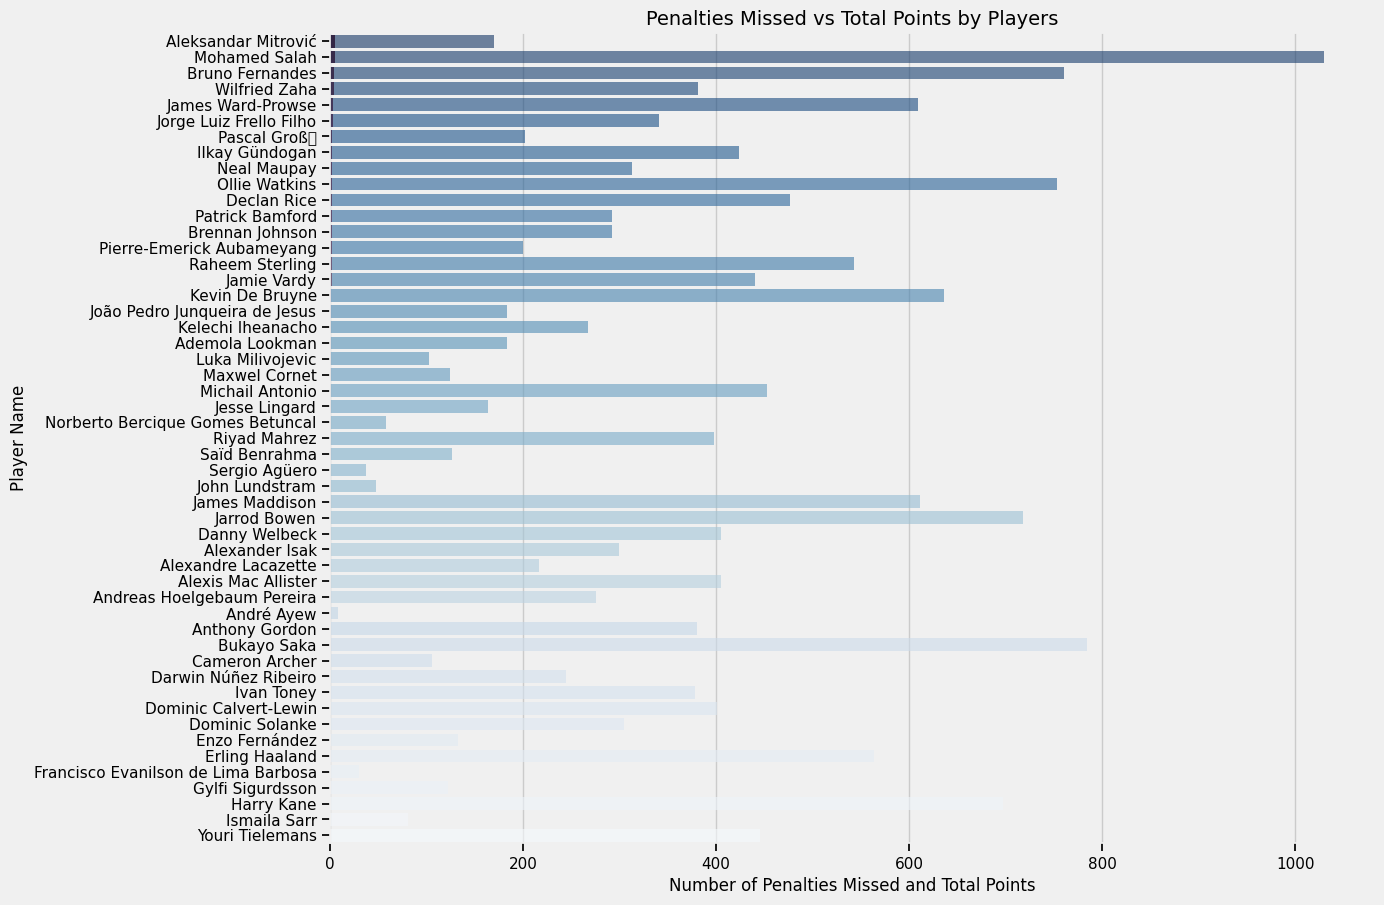

In [890]:
# Group by player and sum penalties missed and total points
penalty_points_summary = master_cleaned.groupby('name')[['penalties_missed', 'total_points']].sum().reset_index()

# Filter for players who missed at least one penalty
penalty_points_summary = penalty_points_summary[penalty_points_summary['penalties_missed'] > 0]

# Sort by penalties missed
penalty_points_summary = penalty_points_summary.sort_values(by='penalties_missed', ascending=False)

# Plotting penalties missed and total points
plt.figure(figsize=(12, 10))
sns.barplot(x='penalties_missed', y='name', data=penalty_points_summary, palette='Reds_r', label='Penalties Missed')
sns.barplot(x='total_points', y='name', data=penalty_points_summary, palette='Blues_r', alpha=0.6, label='Total Points')

plt.title("Penalties Missed vs Total Points by Players", fontsize=14)
plt.xlabel("Number of Penalties Missed and Total Points")
plt.ylabel("Player Name")
# plt.legend(loc='upper right')
plt.show()

Players missing penalties (dark bar) experience a drop in total points (light bar), yet those who take frequent penalties retain value due to their exceptional overall performance (e.g., Salah).

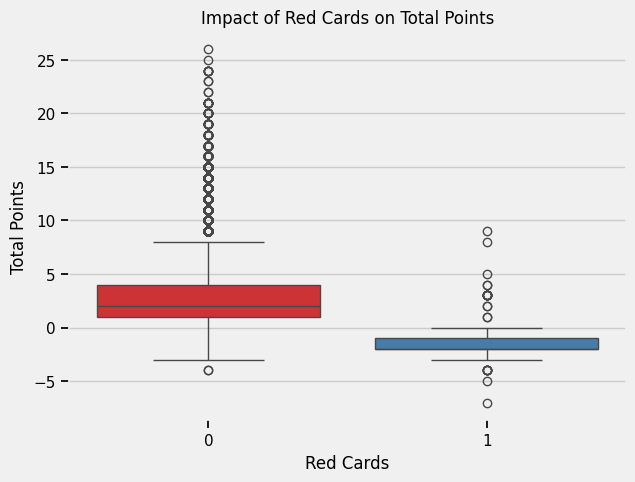

In [891]:
# Red cards impact
sns.boxplot(x='red_cards', y='total_points', data=master_cleaned, palette='Set1')
plt.title("Impact of Red Cards on Total Points")
plt.xlabel("Red Cards")
plt.ylabel("Total Points")
plt.show()

Players receiving a red card (indicated by 1 on the x-axis) have a significantly lower median 'total_points' compared to those without red cards (indicated by 0).
Unlike penalties missed, red cards appear to have a more consistent and severe impact on fantasy scores.

# Step 6: Multivariate Insights

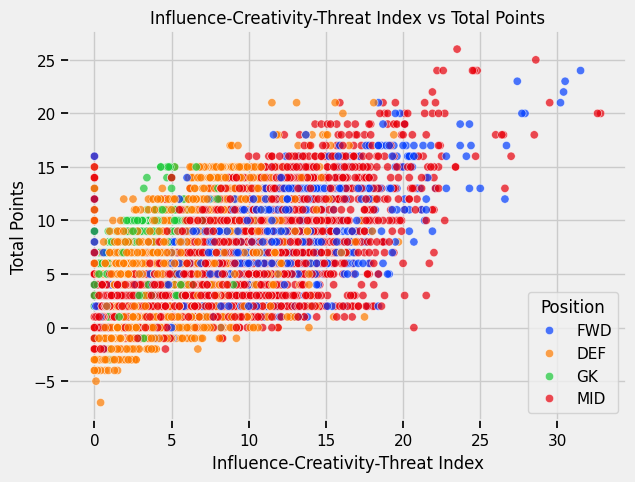

In [892]:
# Influence-Creativity-Threat Index vs Total Points
sns.scatterplot(x='Influence_Creativity_Threat_Index', y='total_points', hue='position', data=master_cleaned, palette='bright', alpha=0.7)
plt.title("Influence-Creativity-Threat Index vs Total Points")
plt.xlabel("Influence-Creativity-Threat Index")
plt.ylabel("Total Points")
plt.legend(title="Position")
plt.show()

There appears to be a positive trend between players with higher 'Influence-Creativity-Threat-Index' and 'total_points'.Forward players dominate high threat and total points due to their primary scoring roles. However, midfielders with balanced indices contribute equally, underlining versatility.

# Step 7: Home and Away

Another important factor for players' performance is whether they are playing home or away matches. The following visualizations delve further into this to assess its impact.

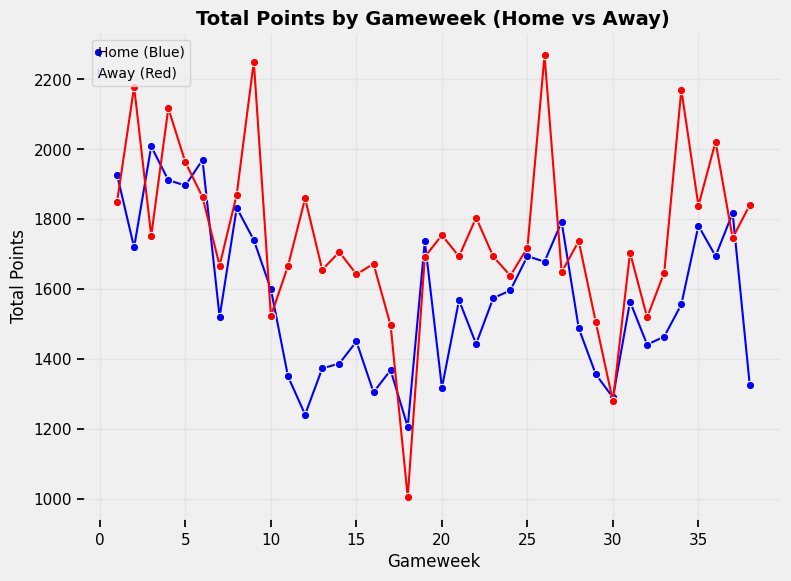

In [893]:
# Calculate total points for home and away games by gameweek
home_away_trend = master_cleaned.groupby(['GW', 'was_home'])['total_points'].sum().reset_index()

# Line plot for total points over gameweeks
plt.figure(figsize=(8, 6))
plot = sns.lineplot(
    x='GW', 
    y='total_points', 
    hue='was_home', 
    data=home_away_trend, 
    palette=['blue', 'red'],  # Define colors for home and away
    marker="o"
)

# Extract the legend labels automatically
handles, labels = plot.get_legend_handles_labels()

# Check the hue mapping to assign the correct labels
if labels[1] == "True":
    legend_labels = ["Home (Blue)", "Away (Red)"]
else:
    legend_labels = ["Away (Blue)", "Home (Red)"]

# Customize the legend
plt.legend(
    title="", 
    labels=legend_labels, 
    fontsize=10, 
    loc='upper left', 
    handlelength=0,  # Remove symbols
    handletextpad=0  # Remove padding between text and symbols
)

# Add title and axis labels
plt.title("Total Points by Gameweek (Home vs Away)", fontsize=14, fontweight='bold')
plt.xlabel("Gameweek", fontsize=12)
plt.ylabel("Total Points", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The chart demonstrates a slight but consistent home advantage across the season, with notable exceptions where away teams outperformed. Peaks and troughs reflect the dynamic nature of the league, influenced by factors like fixture difficulty and team form. This analysis can inform strategies in fantasy sports or team-level evaluations.

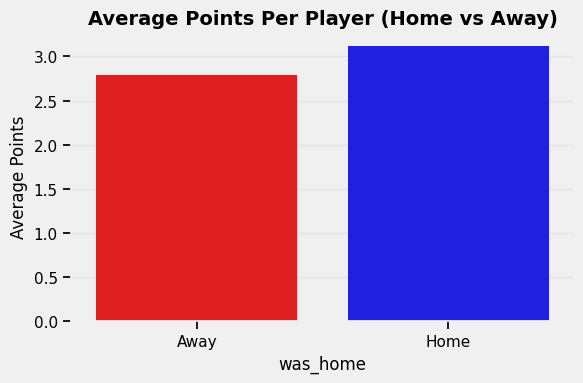

In [894]:
# Calculate average points per player for home and away matches
avg_points_home_away = master_cleaned.groupby('was_home')['total_points'].mean().reset_index()

# Bar plot for average points per player
plt.figure(figsize=(6, 4))
sns.barplot(
    x='was_home', 
    y='total_points', 
    data=avg_points_home_away, 
    palette=['red', 'blue']
)
plt.title("Average Points Per Player (Home vs Away)", fontsize=14, fontweight='bold')
plt.ylabel("Average Points", fontsize=12)
plt.xticks([0, 1], ["Away", "Home"])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Players score more average points at home games than away games. This reinforces the general observation that players tend to perform better at home due to familiarity or crowd support.

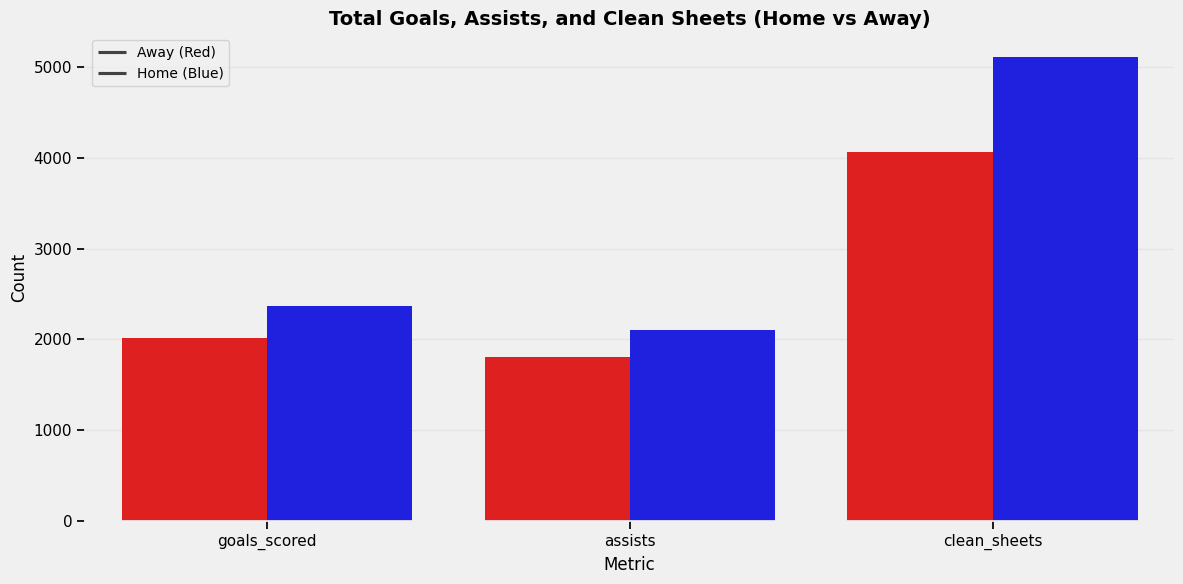

In [895]:
# Calculate total goals, assists, and clean sheets for home and away games
metrics_home_away = master_cleaned.groupby('was_home')[['goals_scored', 'assists', 'clean_sheets']].sum().reset_index()

# Bar plot for total metrics
metrics_home_away_melted = metrics_home_away.melt(id_vars='was_home', var_name='Metric', value_name='Count')

# Explicit labeling with custom legend
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Metric', 
    y='Count', 
    hue='was_home', 
    data=metrics_home_away_melted, 
    palette=['red', 'blue']
)

# Add plot enhancements
plt.title("Total Goals, Assists, and Clean Sheets (Home vs Away)", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.legend(
    labels=["Away (Red)", "Home (Blue)"],
    fontsize=10, 
    title_fontsize=12
)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Home matches outperform away matches in all three metrics: goals scored, assists, and clean sheets.
- The largest difference is observed in clean sheets, suggesting stronger defensive performances at home.

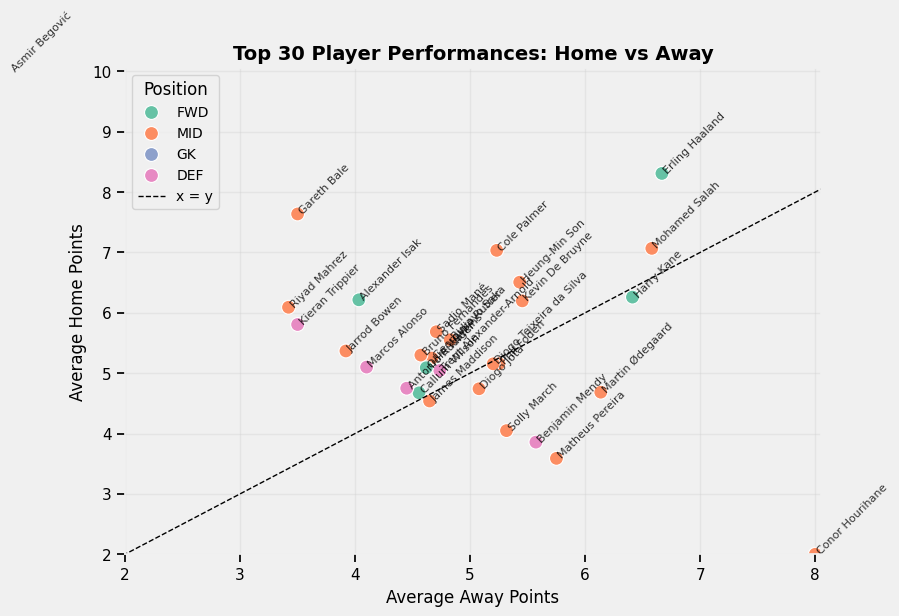

In [896]:
# Calculate Home Points and Away Points based on 'was_home'
home_points_2 = master_cleaned[master_cleaned['was_home'] == True].groupby(['name', 'position']).agg({
    'total_points': 'mean'
}).rename(columns={'total_points': 'Home Points'})

away_points_2 = master_cleaned[master_cleaned['was_home'] == False].groupby(['name', 'position']).agg({
    'total_points': 'mean'
}).rename(columns={'total_points': 'Away Points'})

# Merge Home and Away Points
player_comparison_filtered = home_points_2.merge(away_points_2, on=['name', 'position'], how='outer').reset_index()

# Calculate Total Points (sum of average Home and Away Points)
player_comparison_filtered['Total Points'] = (
    player_comparison_filtered['Home Points'].fillna(0) + 
    player_comparison_filtered['Away Points'].fillna(0)
)

# Sort by Total Points and filter the top 50 players
top30_players = player_comparison_filtered.sort_values(by='Total Points', ascending=False).head(30)

# Plotting the scatter plot with hue based on player position
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Away Points', 
    y='Home Points', 
    hue='position', 
    data=top30_players, 
    edgecolor="w", 
    s=100,
    palette="Set2"
)

# Add a reference line for x = y
max_value = top30_players[['Away Points', 'Home Points']].max().max()
plt.plot(
    [0, max_value], 
    [0, max_value], 
    'k--', linewidth=1, label="x = y"
)

# Annotate players' names
for _, row in top30_players.iterrows():
    plt.text(
        row['Away Points'], 
        row['Home Points'], 
        row['name'], 
        fontsize=8, 
        alpha=0.8,
        rotation=45
    )

# Add plot enhancements
plt.title("Top 30 Player Performances: Home vs Away", fontsize=14, fontweight='bold')
plt.xlabel("Average Away Points", fontsize=12)
plt.ylabel("Average Home Points", fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(2, top30_players['Away Points'].max() + 0.05)
plt.ylim(2, top30_players['Home Points'].max() + 0.05)
plt.legend(title="Position", fontsize=10)
plt.show()

The majority of the data points cluster close to the diagonal line x = y, indicating that for most players, their performance at home and away is relatively similar. However, there are noticeable variations where some players perform significantly better either at home (above the diagonal) or away (below the diagonal).
1. Midfielders (Orange): Some exhibit standout performances at home, reflected in their higher values on the y-axis.
2. Forwards (Green): Many forwards are near or slightly above the x = y line, suggesting their performance might be more consistent but with a slight home advantage.

Gareth Bale and Zack Steffen show exceptionally strong home performance relative to their away stats. Players closer to the diagonal line (e.g. Harry Kane) demonstrate balanced performance across home and away matches. Teams could leverage this data to select players for specific matches. For instance, away matches might require players like Hourihane, while home matches could benefit from players like Bale.

This metric can happen managers decide which players are better suited for home vs away games.

# Step 8: Specific Player Analysis

These plots focus on showing overall trends of high-performing players.

# Top players by total points

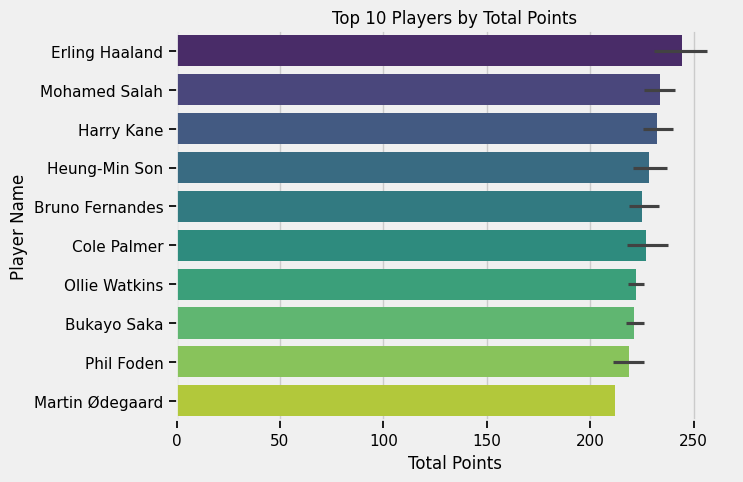

In [918]:
top_players = master_cleaned.nlargest(80, 'cumulative_points')
sns.barplot(x='cumulative_points', y='name', data=top_players, palette='viridis')
plt.title("Top 10 Players by Total Points")
plt.xlabel("Total Points")
plt.ylabel("Player Name")
plt.show()

This chart highlights the top performers in terms of total points, with Erling Haaland, Mohamed Salah, and Harry Kane leading the list. These players are likely to have consistent performance across matches and recurring impressive performances. The ranking provides insight for team selection, especially for fantasy leagues, by identifying players who contribute the most points.

Below is the analysis of Cole Palmer's performance for FPL insights.

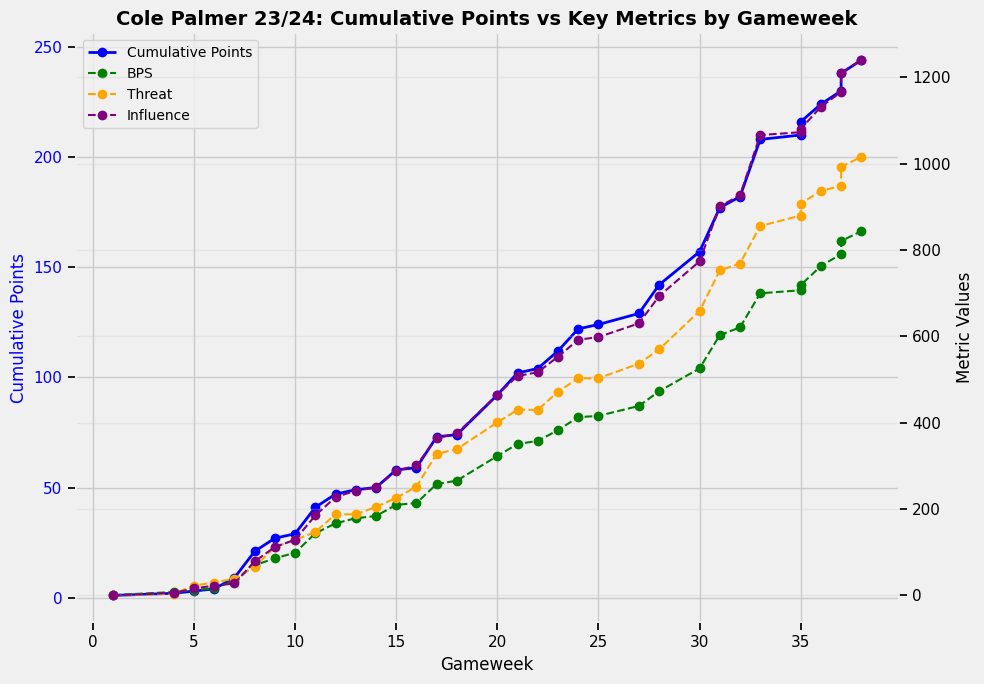

In [911]:
master_cleaned = pd.read_csv('../master_cleaned.csv')

# Filter the data for Cole Palmer
cole_palmer_data = master_cleaned[(master_cleaned['name'] == "Cole Palmer") & (master_cleaned['Season'] == "2023-2024")].copy()

# Sort by Gameweek to ensure proper ordering
cole_palmer_data = cole_palmer_data.sort_values(by='GW')

# Plot cumulative points on the primary y-axis and key metrics on the secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 7))

# Primary y-axis for cumulative points
line1 = ax1.plot(cole_palmer_data['GW'], cole_palmer_data['cumulative_points'], label="Cumulative Points", color='blue', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel("Gameweek", fontsize=12)
ax1.set_ylabel("Cumulative Points", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for key metrics (BPS, Threat, Influence)
ax2 = ax1.twinx()
line2 = ax2.plot(cole_palmer_data['GW'], cole_palmer_data['bps'].cumsum(), label="BPS", color='green', marker='o', linestyle='--', linewidth=1.5)
line3 = ax2.plot(cole_palmer_data['GW'], cole_palmer_data['threat'].cumsum(), label="Threat", color='orange', marker='o', linestyle='--', linewidth=1.5)
line4 = ax2.plot(cole_palmer_data['GW'], cole_palmer_data['influence'].cumsum(), label="Influence", color='purple', marker='o', linestyle='--', linewidth=1.5)
ax2.set_ylabel("Metric Values", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
lines = line1 + line2 + line3 + line4  # Combine all line objects
labels = [l.get_label() for l in lines]  # Get corresponding labels
ax1.legend(lines, labels, loc="upper left", fontsize=10)  # Add single legend

# Add title and grid
plt.title("Cole Palmer 23/24: Cumulative Points vs Key Metrics by Gameweek", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- This visualization ties Palmer’s weekly performance metrics to his cumulative contributions.
- The metrics of Threat, Influence, and Bonus Points System (BPS) are critical drivers of total points in FPL, as they directly reflect a player's attacking potential, overall impact on matches, and consistency in earning bonus points.
- Peaks in BPS and Threat (e.g., Gameweek 24 and Gameweek 32) coincide with major increases in cumulative points.
- The cumulative assessment effectively captures performance over time, highlighting both consistency and standout moments across gameweeks, offering a comprehensive view of a player's contribution.

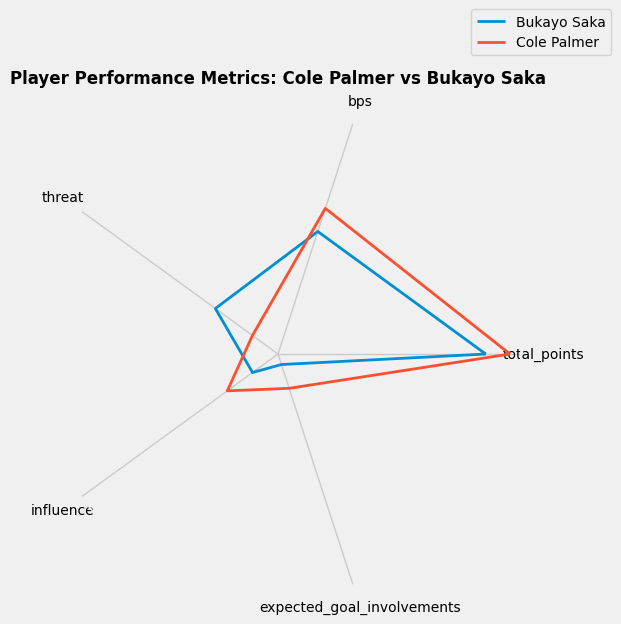

In [900]:
# Define a function to normalize the metrics across all players to a range of [0, 1]
def normalize(series):
    return (series - series.min()) / (series.max() - series.min()) if series.max() != series.min() else series / series.max()

# Select the players for comparison
players = ['Cole Palmer', 'Bukayo Saka']
metrics = ['total_points', 'bps', 'threat', 'influence', 'expected_goal_involvements']

# Normalize the metrics across all players first
master_cleaned[metrics] = master_cleaned[metrics].apply(normalize)

# Filter the data for the selected players and calculate their mean metrics
player_data = master_cleaned[master_cleaned['name'].isin(players)].groupby('name')[metrics].mean()

# Create the radar chart
categories = metrics
num_vars = len(categories)

# Compute the angle for each metric
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the radar chart

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot data for each player
for player in player_data.index:
    values = player_data.loc[player].tolist()
    values += values[:1]  # Close the radar chart
    # ax.fill(angles, values, alpha=0.25, label=player)
    ax.plot(angles, values, linewidth=2, label=player)

# Add labels for each axis
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Add title and legend
plt.title("Player Performance Metrics: Cole Palmer vs Bukayo Saka", fontsize=12, fontweight='bold', pad=20)
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.show()

- Cole Palmer clearly outperforms Bukayo Saka in 4 of 5 metrics: total points, bonus points system (bps), expected goal involvements (xGI), and influence.
- Conversely, Bukayo Saka outperforms Cole Palmer only in Threat.
- This radar chart can help show the effect of different metrics on the total points as well as compare players performance using different indicators.

# Outcome

1. The key takeaway from all the graphs is that player performance in FPL is multifaceted.
2. A combination of metrics such as BPS (Bonus Points System), Influence, Threat, Expected Goals (xG), Goals Scored, Fixture Difficulty, and Position Trends provide a more comprehensive understanding. 
3. The pairwise relationships heatmap confirms that BPS, Influence, Goals Scored, and Threat are the most critical drivers of total points. Metrics like Influence and Threat consistently correlate with BPS and Total Points, as seen in the heatmap and Cole Palmer's trends. Players who dominate these areas tend to accumulate higher fantasy scores.
4. Position analysis: Midfielders and Forwards are high-potential positions but exhibit variability. Defenders and Goalkeepers rely on consistent metrics like clean sheets for points.
5. Home advantage is evident in the gameweek trend, with higher total points scored during home games. This can be used to assess which players perform better in home vs away and playing accordingly.
6. Scatterplots like xG vs. Goals Scored and Home vs. Away Points reveal standout performers who consistently overperform (e.g., Salah, Kane, Haaland). Identifying such reliable players is crucial for fantasy success.